In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
input_dir = '/Users/suxuanrong/Desktop/关于横市啊/GCI/コンペ２/input/'

train = pd.read_csv(input_dir + 'train.csv')
test = pd.read_csv(input_dir + 'test.csv')
sample_sub = pd.read_csv(input_dir + 'sample_submission.csv')

In [77]:
train.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,Cash loans,F,N,N,0,112500.0,755190.0,36328.5,...,NaN,0.0,0.0,0.0,0.0,-292.0,NaN,NaN,NaN,NaN
1,1,0,Cash loans,F,N,Y,0,225000.0,585000.0,16893.0,...,0.553165,0.0,0.0,0.0,0.0,-617.0,0.0,0.0,0.0,1.0
2,2,0,Cash loans,F,N,Y,0,54000.0,334152.0,18256.5,...,NaN,4.0,0.0,4.0,0.0,-542.0,NaN,NaN,NaN,NaN


In [78]:
print(f"train shape: {train.shape}")
print(f"test shape: {test.shape}")

train shape: (171202, 51)
test shape: (61500, 50)


In [79]:
test.head(3)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,171202,Cash loans,F,N,N,1,144000.0,961146.0,28233.0,688500.0,...,NaN,2.0,0.0,2.0,0.0,-1.0,NaN,NaN,NaN,NaN
1,171203,Cash loans,F,N,N,0,103500.0,296280.0,16069.5,225000.0,...,NaN,5.0,0.0,5.0,0.0,-212.0,NaN,NaN,NaN,NaN
2,171204,Cash loans,F,N,Y,1,180000.0,183694.5,11236.5,139500.0,...,0.389339,7.0,0.0,7.0,0.0,-428.0,0.0,1.0,1.0,1.0


In [80]:
train.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                    34241
FLAG_OWN_REALTY                 34241
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         6
AMT_GOODS_PRICE                   163
NAME_TYPE_SUITE                   747
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    112992
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [81]:
test.isnull().sum()

SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                   12334
FLAG_OWN_REALTY                12334
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        3
AMT_GOODS_PRICE                   53
NAME_TYPE_SUITE                  248
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                    40909
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [82]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,171202.00000,171202.000000,171202.000000,1.712020e+05,1.712020e+05,171196.000000,1.710390e+05,171202.000000,171202.000000,171202.000000,...,116616.000000,170642.000000,170642.000000,170642.000000,170642.000000,171201.000000,148086.000000,148086.000000,148086.000000,148086.000000
mean,85600.50000,0.080729,0.416490,1.683712e+05,5.991293e+05,27127.500701,5.384669e+05,0.020839,-16045.340504,63960.411969,...,0.511177,1.423137,0.143915,1.406406,0.100438,-962.411218,0.006652,0.268418,0.267547,1.903644
std,49421.90473,0.272420,0.720138,1.072348e+05,4.028170e+05,14538.361801,3.696921e+05,0.013803,4363.792228,141401.513149,...,0.194778,2.323733,0.443579,2.303540,0.360037,826.278427,0.086204,0.921022,0.914532,1.872237
min,0.00000,0.000000,0.000000,2.610000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000290,-25229.000000,-17912.000000,...,0.000527,0.000000,0.000000,0.000000,0.000000,-4173.000000,0.000000,0.000000,0.000000,0.000000
25%,42800.25000,0.000000,0.000000,1.125000e+05,2.700000e+05,16546.500000,2.385000e+05,0.010006,-19686.000000,-2772.000000,...,0.370650,0.000000,0.000000,0.000000,0.000000,-1568.000000,0.000000,0.000000,0.000000,0.000000
50%,85600.50000,0.000000,0.000000,1.462500e+05,5.146020e+05,24916.500000,4.500000e+05,0.018850,-15778.000000,-1215.000000,...,0.537070,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,1.000000
75%,128400.75000,0.000000,1.000000,2.025000e+05,8.086500e+05,34600.500000,6.795000e+05,0.028663,-12420.000000,-288.000000,...,0.669057,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,3.000000
max,171201.00000,1.000000,14.000000,1.350000e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7673.000000,365243.000000,...,0.896010,47.000000,8.000000,47.000000,7.000000,0.000000,4.000000,23.000000,261.000000,23.000000


In [3]:
#例の五つ特徴量
use_features = ["NAME_CONTRACT_TYPE", "AMT_INCOME_TOTAL", "EXT_SOURCE_2", "OWN_CAR_AGE", "ORGANIZATION_TYPE"]
target = train["TARGET"].values

train1 = train[use_features]
train1["TARGET"] = target
test1 = test[use_features]

In [4]:
# EXT_SOURCE_2の欠損値を平均値で補完
train1["EXT_SOURCE_2"].fillna(train1["EXT_SOURCE_2"].mean(), inplace=True)
test1["EXT_SOURCE_2"].fillna(train1["EXT_SOURCE_2"].mean(), inplace=True)

train1.isnull().sum()

NAME_CONTRACT_TYPE         0
AMT_INCOME_TOTAL           0
EXT_SOURCE_2               0
OWN_CAR_AGE           112992
ORGANIZATION_TYPE          0
TARGET                     0
dtype: int64

In [5]:
# NAME_CONTRACT_TYPEの数値化（Label Encoding）
train1["NAME_CONTRACT_TYPE"].replace({'Cash loans': 0, 'Revolving loans': 1}, inplace=True)
test1["NAME_CONTRACT_TYPE"].replace({'Cash loans': 0, 'Revolving loans': 1}, inplace=True)

train1.head(5)

,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,EXT_SOURCE_2,OWN_CAR_AGE,ORGANIZATION_TYPE,TARGET
0,0,112500.0,0.372591,NaN,School,0
1,0,225000.0,0.449567,NaN,XNA,0
2,0,54000.0,0.569503,NaN,Postal,0
3,0,67500.0,0.105235,NaN,XNA,0
4,0,157500.0,0.202490,NaN,Business Entity Type 3,1


In [6]:
# ORGANIZATION_TYPEの数値化（Count Encoding）
organization_ce = train1["ORGANIZATION_TYPE"].value_counts()
train1["ORGANIZATION_TYPE"] = train1["ORGANIZATION_TYPE"].map(organization_ce)
test1["ORGANIZATION_TYPE"] = test1["ORGANIZATION_TYPE"].map(organization_ce)

train1.head(5)

,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,EXT_SOURCE_2,OWN_CAR_AGE,ORGANIZATION_TYPE,TARGET
0,0,112500.0,0.372591,NaN,4991,0
1,0,225000.0,0.449567,NaN,30898,0
2,0,54000.0,0.569503,NaN,1185,0
3,0,67500.0,0.105235,NaN,30898,0
4,0,157500.0,0.202490,NaN,37943,1


In [7]:
# OWN_CAR_AGEの60以上の値（外れ値）を欠損値扱いする
train1.loc[train1["OWN_CAR_AGE"] >= 60, "OWN_CAR_AGE"] = np.nan
test1.loc[test1["OWN_CAR_AGE"] >= 60, "OWN_CAR_AGE"] = np.nan

In [8]:
# OWN_CAR_AGEをグループ分け
train1["OWN_CAR_AGE"] = train1["OWN_CAR_AGE"] // 10
test1["OWN_CAR_AGE"] = test1["OWN_CAR_AGE"] // 10

train1["OWN_CAR_AGE"].unique()

array([nan,  0.,  2.,  1.,  3.,  4.,  5.])

In [9]:
# OWN_CAR_AGEをOne Hot Encoding
train_car_age_ohe = pd.get_dummies(train1["OWN_CAR_AGE"]).add_prefix("OWN_CAR_AGE_")
test_car_age_ohe = pd.get_dummies(test1["OWN_CAR_AGE"]).add_prefix("OWN_CAR_AGE_")

train1 = pd.concat([train1, train_car_age_ohe], axis=1)
test1 = pd.concat([test1, test_car_age_ohe], axis=1)

train1.drop('OWN_CAR_AGE', axis=1, inplace=True)
test1.drop('OWN_CAR_AGE', axis=1, inplace=True)

train1.head(5)

,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,EXT_SOURCE_2,ORGANIZATION_TYPE,TARGET,OWN_CAR_AGE_0.0,OWN_CAR_AGE_1.0,OWN_CAR_AGE_2.0,OWN_CAR_AGE_3.0,OWN_CAR_AGE_4.0,OWN_CAR_AGE_5.0
0,0,112500.0,0.372591,4991,0,0,0,0,0,0,0
1,0,225000.0,0.449567,30898,0,0,0,0,0,0,0
2,0,54000.0,0.569503,1185,0,0,0,0,0,0,0
3,0,67500.0,0.105235,30898,0,0,0,0,0,0,0
4,0,157500.0,0.202490,37943,1,0,0,0,0,0,0


## 自己的1

In [25]:
#二つの特徴量に絞る
features1 = ['CNT_CHILDREN', 'AMT_CREDIT']
eda1 = train[features1]
target = train['TARGET'].values
eda1['TARGET'] = target
eda1_test = test[features1]

In [26]:
#trainデータの確認
print(f'eda1 shape: {eda1.shape}')
eda1.head(3)

eda1 shape: (171202, 3)


,CNT_CHILDREN,AMT_CREDIT,TARGET
0,0,755190.0,0
1,0,585000.0,0
2,0,334152.0,0


In [12]:
eda1.isnull().sum()

CNT_CHILDREN    0
AMT_CREDIT      0
TARGET          0
dtype: int64

In [13]:
eda1_test.isnull().sum()

CNT_CHILDREN    0
AMT_CREDIT      0
dtype: int64

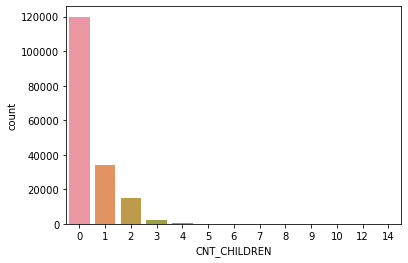

In [14]:
#可視化
#CNT_CHILDREN
sns.countplot(data = eda1, x = 'CNT_CHILDREN')
plt.show()

In [15]:
eda1['CNT_CHILDREN'].value_counts()

0     119950
1      33975
2      14932
3       2049
4        230
5         40
6         13
7          5
10         2
8          2
14         2
9          1
12         1
Name: CNT_CHILDREN, dtype: int64

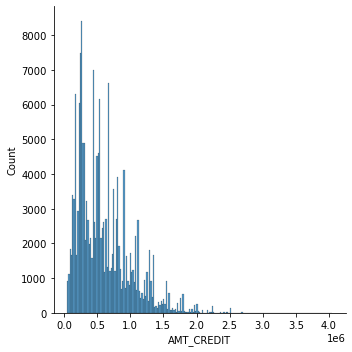

In [16]:
#AMT_CREDIT
sns.displot(data = eda1, x = 'AMT_CREDIT')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

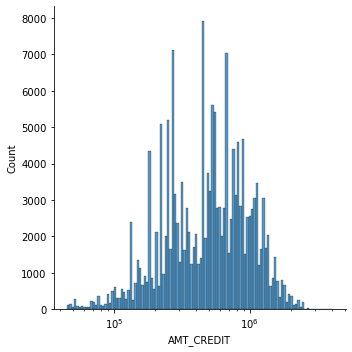

In [17]:
sns.displot(data = eda1, x = 'AMT_CREDIT', log_scale = 10)
plt.show

In [18]:
len(eda1['AMT_CREDIT'].unique())

4796

In [19]:
eda1['AMT_CREDIT'].value_counts().head(20)
#そんなにキリがいいではないなぁ

450000.0     5355
675000.0     4883
225000.0     4554
270000.0     4026
180000.0     4026
900000.0     3373
254700.0     2520
545040.0     2487
808650.0     2337
135000.0     2070
755190.0     1967
1125000.0    1960
521280.0     1769
284400.0     1731
1078200.0    1583
454500.0     1520
1288350.0    1423
269550.0     1357
781920.0     1300
1350000.0    1287
Name: AMT_CREDIT, dtype: int64

In [27]:
#データの加工
eda1.loc[eda1['CNT_CHILDREN'] >= 6, 'CNT_CHILDREN'] = 6
eda1_test.loc[eda1_test['CNT_CHILDREN'] >= 6, 'CNT_CHILDREN'] = 6

In [21]:
eda1['CNT_CHILDREN'].value_counts()

0    119950
1     33975
2     14932
3      2049
4       230
5        40
6        26
Name: CNT_CHILDREN, dtype: int64

In [22]:
eda1.head(2)

,CNT_CHILDREN,AMT_CREDIT,TARGET
0,0,755190.0,0
1,0,585000.0,0


In [23]:
eda1_CNT_CHILDREN_ohe = pd.get_dummies(eda1['CNT_CHILDREN']).add_prefix('CNT_CHILDREN_')
eda1_test_CNT_CHILDREN_ohe = pd.get_dummies(eda1_test['CNT_CHILDREN']).add_prefix('CNT_CHILDREN_')

eda1 = pd.concat([eda1, eda1_CNT_CHILDREN_ohe], axis = 1)
eda1_test = pd.concat([eda1_test, eda1_test_CNT_CHILDREN_ohe], axis = 1)

eda1.drop('CNT_CHILDREN', axis = 1, inplace = True)
eda1_test.drop('CNT_CHILDREN', axis = 1, inplace = True)


eda1.head(5)


,AMT_CREDIT,TARGET,CNT_CHILDREN_0,CNT_CHILDREN_1,CNT_CHILDREN_2,CNT_CHILDREN_3,CNT_CHILDREN_4,CNT_CHILDREN_5,CNT_CHILDREN_6
0,755190.0,0,1,0,0,0,0,0,0
1,585000.0,0,1,0,0,0,0,0,0
2,334152.0,0,1,0,0,0,0,0,0
3,152820.0,0,1,0,0,0,0,0,0
4,271066.5,1,1,0,0,0,0,0,0


#データの加工
eda1.loc[eda1['CNT_CHILDREN'] >= 6, 'CNT_CHILDREN'] = 6
eda1_test.loc[eda1_test['CNT_CHILDREN'] >= 6, 'CNT_CHILDREN'] = 6
eda1_CNT_CHILDREN_ohe = pd.get_dummies(eda1['CNT_CHILDREN']).add_prefix('CNT_CHILDREN_')
eda1_test_CNT_CHILDREN_ohe = pd.get_dummies(eda1_test['CNT_CHILDREN']).add_prefix('CNT_CHILDREN_')

eda1 = pd.concat([eda1, eda1_CNT_CHILDREN_ohe], axis = 1)
eda1_test = pd.concat([eda1_test, eda1_test_CNT_CHILDREN_ohe], axis = 1)

eda1.drop('CNT_CHILDREN', axis = 1, inplace = True)
eda1_test.drop('CNT_CHILDREN', axis = 1, inplace = True)


eda1.head(5)



In [28]:
eda1 = eda1.drop("TARGET", axis = 1)
eda1 = pd.concat([train1, eda1], axis = 1)
eda1_test = pd.concat([test1, eda1_test], axis = 1)
eda1.head(4)

,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,EXT_SOURCE_2,ORGANIZATION_TYPE,TARGET,OWN_CAR_AGE_0.0,OWN_CAR_AGE_1.0,OWN_CAR_AGE_2.0,OWN_CAR_AGE_3.0,OWN_CAR_AGE_4.0,OWN_CAR_AGE_5.0,CNT_CHILDREN,AMT_CREDIT
0,0,112500.0,0.372591,4991,0,0,0,0,0,0,0,0,755190.0
1,0,225000.0,0.449567,30898,0,0,0,0,0,0,0,0,585000.0
2,0,54000.0,0.569503,1185,0,0,0,0,0,0,0,0,334152.0
3,0,67500.0,0.105235,30898,0,0,0,0,0,0,0,0,152820.0


In [73]:
#モデルの作成
# ライブラリの読み込み
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [46]:
# 目的変数と説明変数に分割
X = eda1.drop("TARGET", axis=1).values
y = eda1["TARGET"].values
X_test = eda1_test.values

,TARGET,TARGET
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
171197,0,0
171198,0,0
171199,0,0
171200,0,0


In [47]:
# 標準化
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
X_test_std = sc.transform(X_test)

In [48]:
# 訓練データと評価データに分割
X_train, X_valid, y_train, y_valid = train_test_split(X_std, y, test_size=0.3, stratify=y, random_state=0)

In [50]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 1)
lr.fit(X_train, y_train)

lr_train_pred = lr.predict_proba(X_train)[:, 1]
lr_valid_pred = lr.predict_proba(X_valid)[:, 1]
print(f'Train Score: {roc_auc_score(y_train, lr_train_pred)}')
print(f'Valid Score: {roc_auc_score(y_valid, lr_valid_pred)}')


Train Score: 0.6637664298101044
Valid Score: 0.6660380211040023


In [53]:
#MLPClassifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state = 1)
mlp.fit(X_train, y_train)

mlp_train_pred = mlp.predict_proba(X_train)[:, 1]
mlp_valid_pred = mlp.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, mlp_train_pred)}")
print(f"Test Score: {roc_auc_score(y_valid, mlp_valid_pred)}")



Train Score: 0.6896907166779229
Test Score: 0.6732736608035244


In [56]:
# XGBClassifier
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state= 1)
xgb.fit(X_train, y_train)

xgb_train_pred = xgb.predict_proba(X_train)[:, 1]
xgb_valid_pred = xgb.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, xgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, xgb_valid_pred)}")

Train Score: 0.7893620292346232
Valid Score: 0.6747356482562066


In [54]:
# LGBMClassfier
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state = 1)
lgb.fit(X_train, y_train)

lgb_train_pred = lgb.predict_proba(X_train)[:, 1]
lgb_valid_pred = lgb.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, lgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, lgb_valid_pred)}")

Train Score: 0.7451325767677539
Valid Score: 0.6820313354471154


In [57]:
train_pred = (lr_train_pred + mlp_train_pred + lgb_train_pred + xgb_train_pred)/4
valid_pred = (lr_valid_pred + mlp_valid_pred + lgb_valid_pred + xgb_valid_pred)/4

print(f"Train Score: {roc_auc_score(y_train, train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, valid_pred)}")

Train Score: 0.7463696941064416
Valid Score: 0.6841515158434804


## 自己的2

In [34]:
#３つに絞る
features2 = ['OCCUPATION_TYPE', 'AMT_GOODS_PRICE', 'NAME_EDUCATION_TYPE']
eda2 = train[features2]

eda2_test = test[features2]

In [35]:
#trainデータの確認
print(f'eda2 shape: {eda2.shape}')
eda2.head(3)

eda2 shape: (171202, 3)


,OCCUPATION_TYPE,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE
0,Core staff,675000.0,Higher education
1,NaN,585000.0,Secondary / secondary special
2,Core staff,270000.0,Secondary / secondary special


In [46]:
eda2.isnull().sum()

OCCUPATION_TYPE        53745
AMT_GOODS_PRICE          163
NAME_EDUCATION_TYPE        0
dtype: int64

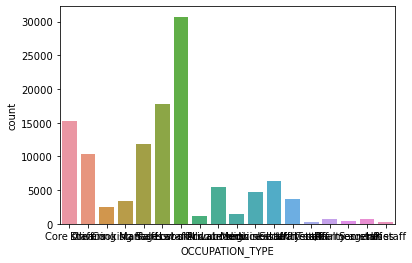

In [47]:
#可視化
#OCCUPATION_TYPE
sns.countplot(data = eda2, x = 'OCCUPATION_TYPE')
plt.show()

In [48]:
len(eda2['OCCUPATION_TYPE'].unique())

19

In [49]:
eda2['OCCUPATION_TYPE'].value_counts()

Laborers                 30723
Sales staff              17793
Core staff               15271
Managers                 11855
Drivers                  10353
High skill tech staff     6385
Accountants               5506
Medicine staff            4744
Security staff            3752
Cooking staff             3353
Cleaning staff            2567
Private service staff     1457
Low-skill Laborers        1158
Secretaries                762
Waiters/barmen staff       747
Realty agents              416
HR staff                   309
IT staff                   306
Name: OCCUPATION_TYPE, dtype: int64

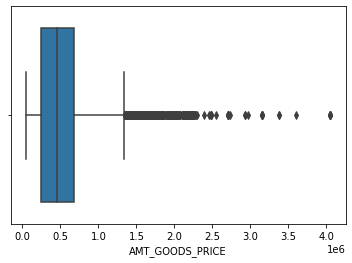

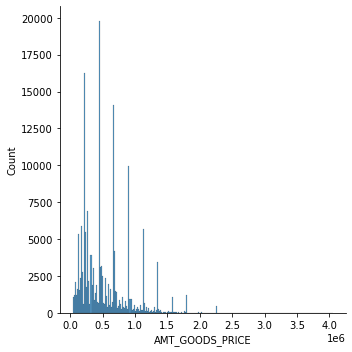

In [50]:
#可視化
#OCCUPATION_TYPE
sns.boxplot(data = eda2, x = 'AMT_GOODS_PRICE')
sns.displot(data = eda2, x = 'AMT_GOODS_PRICE')
plt.show()

In [51]:
len(eda2['AMT_GOODS_PRICE'].unique())

756

In [52]:
eda2['AMT_GOODS_PRICE'].value_counts().head(20)
#キリがいいなぁ

450000.0     14400
225000.0     14066
675000.0     13883
900000.0      8479
270000.0      6324
180000.0      5561
454500.0      5116
1125000.0     5017
135000.0      4649
315000.0      2925
1350000.0     2808
679500.0      2699
238500.0      2657
360000.0      2552
247500.0      2430
463500.0      2176
540000.0      2113
495000.0      2002
90000.0       1783
202500.0      1742
Name: AMT_GOODS_PRICE, dtype: int64

In [53]:
print(f'mean {eda2["AMT_GOODS_PRICE"].mean()}')
print(f'mode {eda2["AMT_GOODS_PRICE"].mode()}')

mean 538466.9265167593
mode 0    450000.0
dtype: float64


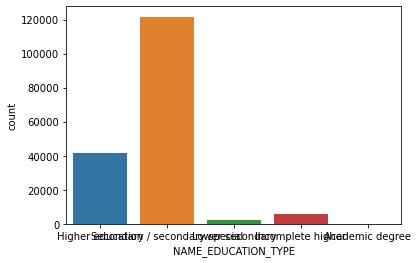

In [54]:
#可視化
#NAME_EDUCATION_TYPE
sns.countplot(data = eda2, x = 'NAME_EDUCATION_TYPE')
#sns.displot(data = eda2, x = 'AMT_GOODS_PRICE')
plt.show()

In [55]:
eda2['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    121612
Higher education                  41645
Incomplete higher                  5711
Lower secondary                    2133
Academic degree                     101
Name: NAME_EDUCATION_TYPE, dtype: int64

In [36]:
#データの加工
eda2_NAME_EDUCATION_TYPE_ohe = pd.get_dummies(eda2['NAME_EDUCATION_TYPE']).add_prefix('NAME_EDUCATION_TYPE')
eda2_test_NAME_EDUCATION_TYPE_ohe = pd.get_dummies(eda2_test['NAME_EDUCATION_TYPE']).add_prefix('NAME_EDUCATION_TYPE')

eda2 = pd.concat([eda2, eda2_NAME_EDUCATION_TYPE_ohe], axis = 1)
eda2_test = pd.concat([eda2_test, eda2_test_NAME_EDUCATION_TYPE_ohe], axis = 1)

eda2.drop('NAME_EDUCATION_TYPE', axis = 1, inplace = True)
eda2_test.drop('NAME_EDUCATION_TYPE', axis = 1, inplace = True)


eda2.head(5)



,OCCUPATION_TYPE,AMT_GOODS_PRICE,NAME_EDUCATION_TYPEAcademic degree,NAME_EDUCATION_TYPEHigher education,NAME_EDUCATION_TYPEIncomplete higher,NAME_EDUCATION_TYPELower secondary,NAME_EDUCATION_TYPESecondary / secondary special
0,Core staff,675000.0,0,1,0,0,0
1,NaN,585000.0,0,0,0,0,1
2,Core staff,270000.0,0,0,0,0,1
3,NaN,135000.0,0,0,0,1,0
4,Drivers,234000.0,0,0,0,0,1


In [37]:
eda2 = eda2.fillna({'AMT_GOODS_PRICE': 450000.0, 'OCCUPATION_TYPE':'unknow'})
eda2_test = eda2_test.fillna({'AMT_GOODS_PRICE': 450000.0, 'OCCUPATION_TYPE':'unknow'})


            

In [33]:
eda2.isnull().sum()

OCCUPATION_TYPE                                     0
AMT_GOODS_PRICE                                     0
NAME_EDUCATION_TYPEAcademic degree                  0
NAME_EDUCATION_TYPEHigher education                 0
NAME_EDUCATION_TYPEIncomplete higher                0
NAME_EDUCATION_TYPELower secondary                  0
NAME_EDUCATION_TYPESecondary / secondary special    0
dtype: int64

In [38]:
eda2_OCCUPATION_TYPE_ohe = pd.get_dummies(eda2['OCCUPATION_TYPE']).add_prefix('OCCUPATION_TYPE')
eda2_test_OCCUPATION_TYPE_ohe = pd.get_dummies(eda2_test['OCCUPATION_TYPE']).add_prefix('OCCUPATION_TYPE')

eda2 = pd.concat([eda2, eda2_OCCUPATION_TYPE_ohe], axis = 1)
eda2_test = pd.concat([eda2_test, eda2_test_OCCUPATION_TYPE_ohe], axis = 1)

eda2.drop('OCCUPATION_TYPE', axis = 1, inplace = True)
eda2_test.drop('OCCUPATION_TYPE', axis = 1, inplace = True)


eda2.head(5)



,AMT_GOODS_PRICE,NAME_EDUCATION_TYPEAcademic degree,NAME_EDUCATION_TYPEHigher education,NAME_EDUCATION_TYPEIncomplete higher,NAME_EDUCATION_TYPELower secondary,NAME_EDUCATION_TYPESecondary / secondary special,OCCUPATION_TYPEAccountants,OCCUPATION_TYPECleaning staff,OCCUPATION_TYPECooking staff,OCCUPATION_TYPECore staff,...,OCCUPATION_TYPELow-skill Laborers,OCCUPATION_TYPEManagers,OCCUPATION_TYPEMedicine staff,OCCUPATION_TYPEPrivate service staff,OCCUPATION_TYPERealty agents,OCCUPATION_TYPESales staff,OCCUPATION_TYPESecretaries,OCCUPATION_TYPESecurity staff,OCCUPATION_TYPEWaiters/barmen staff,OCCUPATION_TYPEunknow
0,675000.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,585000.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,270000.0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,135000.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,234000.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#最終２データ
eda2 = pd.concat([eda1, eda2], axis = 1)
eda2_test = pd.concat([eda1_test, eda2_test], axis = 1)

In [237]:
eda2_test.isnull().sum()

NAME_CONTRACT_TYPE                                  0
AMT_INCOME_TOTAL                                    0
EXT_SOURCE_2                                        0
ORGANIZATION_TYPE                                   0
OWN_CAR_AGE_0.0                                     0
OWN_CAR_AGE_1.0                                     0
OWN_CAR_AGE_2.0                                     0
OWN_CAR_AGE_3.0                                     0
OWN_CAR_AGE_4.0                                     0
OWN_CAR_AGE_5.0                                     0
AMT_CREDIT                                          0
CNT_CHILDREN_0                                      0
CNT_CHILDREN_1                                      0
CNT_CHILDREN_2                                      0
CNT_CHILDREN_3                                      0
CNT_CHILDREN_4                                      0
CNT_CHILDREN_5                                      0
CNT_CHILDREN_6                                      0
NAME_CONTRACT_TYPE          

In [112]:
#モデルの作成
# ライブラリの読み込み
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [120]:
# 目的変数と説明変数に分割
X = eda2.drop("TARGET", axis=1).values
y = eda2["TARGET"].values
X_test = eda2_test.values

In [121]:
# 標準化
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
X_test_std = sc.transform(X_test)

In [267]:
# 訓練データと評価データに分割
X_train, X_valid, y_train, y_valid = train_test_split(X_std, y, test_size=0.3, stratify=y, random_state=1)

In [268]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 1)
lr.fit(X_train, y_train)

lr_train_pred = lr.predict_proba(X_train)[:, 1]
lr_valid_pred = lr.predict_proba(X_valid)[:, 1]
print(f'Train Score: {roc_auc_score(y_train, lr_train_pred)}')
print(f'Valid Score: {roc_auc_score(y_valid, lr_valid_pred)}')



Train Score: 0.6894148201344825
Valid Score: 0.6850008523479465


In [269]:
#MLPClassifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state = 1)
mlp.fit(X_train, y_train)

mlp_train_pred = mlp.predict_proba(X_train)[:, 1]
mlp_valid_pred = mlp.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, mlp_train_pred)}")
print(f"Test Score: {roc_auc_score(y_valid, mlp_valid_pred)}")




Train Score: 0.7076924468365122
Test Score: 0.6761828390302717


In [270]:
# XGBClassifier
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state= 1)
xgb.fit(X_train, y_train)

xgb_train_pred = xgb.predict_proba(X_train)[:, 1]
xgb_valid_pred = xgb.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, xgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, xgb_valid_pred)}")

Train Score: 0.8129038325578768
Valid Score: 0.6847062495316174


In [271]:
# LGBMClassfier
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state = 1)
lgb.fit(X_train, y_train)

lgb_train_pred = lgb.predict_proba(X_train)[:, 1]
lgb_valid_pred = lgb.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, lgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, lgb_valid_pred)}")

Train Score: 0.7647874250936606
Valid Score: 0.6937656124371588


In [272]:
train_pred = (lr_train_pred + mlp_train_pred + lgb_train_pred + xgb_train_pred)/4
valid_pred = (lr_valid_pred + mlp_valid_pred + lgb_valid_pred + xgb_valid_pred)/4

print(f"Train Score: {roc_auc_score(y_train, train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, valid_pred)}")

Train Score: 0.7695553710090589
Valid Score: 0.6946848225719106


## 自己的3

In [40]:
#３つに絞る
features3 = ['REGION_RATING_CLIENT', 'FLAG_EMP_PHONE', 'CNT_FAM_MEMBERS']
eda3 = train[features3]

eda3_test = test[features3]

In [41]:
eda3_test.isnull().sum()

REGION_RATING_CLIENT    0
FLAG_EMP_PHONE          0
CNT_FAM_MEMBERS         0
dtype: int64

In [179]:
eda3.head()

,REGION_RATING_CLIENT,FLAG_EMP_PHONE,CNT_FAM_MEMBERS
0,2,1,2.0
1,2,0,2.0
2,2,1,2.0
3,3,0,1.0
4,3,1,2.0


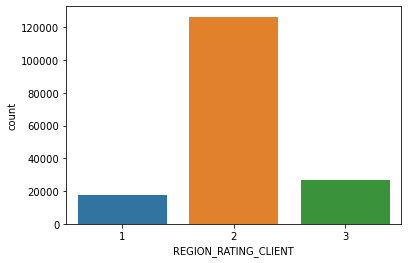

In [180]:
#可視化
#REGION_RATING_CLIENT
sns.countplot(data = eda3, x = 'REGION_RATING_CLIENT')
plt.show()

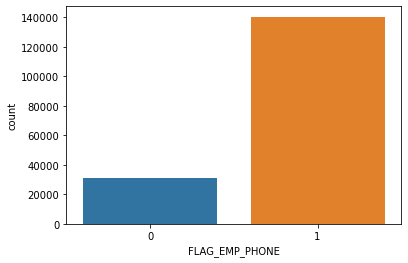

In [181]:
#可視化
#FLAG_EMP_PHONE
sns.countplot(data = eda3, x = 'FLAG_EMP_PHONE')
plt.show()

<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='count'>

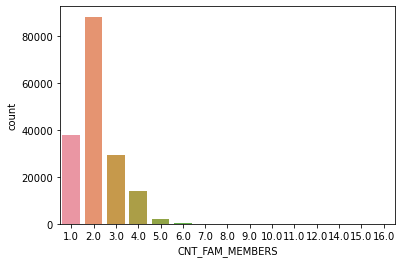

In [182]:
#可視化
#CNT_FAM_MEMBERS
sns.countplot(data = eda3, x = 'CNT_FAM_MEMBERS')
#plt.show()

In [184]:
len(eda3['CNT_FAM_MEMBERS'].unique())

16

In [492]:
eda3['CNT_FAM_MEMBERS'].value_counts()

2.0     88165
1.0     37766
3.0     29284
4.0     13801
5.0      1903
6.0       220
7.0        36
8.0        13
9.0         4
12.0        2
10.0        2
11.0        1
14.0        1
15.0        1
16.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

In [42]:
# OWN_CAR_AGEの60以上の値（外れ値）を欠損値扱いする
eda3.loc[eda3["CNT_FAM_MEMBERS"] >= 7, "CNT_FAM_MEMBERS"] = 7
eda3_test.loc[eda3_test["CNT_FAM_MEMBERS"] >= 7, "CNT_FAM_MEMBERS"] = 7


In [43]:
eda3_test['CNT_FAM_MEMBERS'].value_counts()

2.0    31420
1.0    13730
3.0    10560
4.0     4964
5.0      700
6.0       91
7.0       35
Name: CNT_FAM_MEMBERS, dtype: int64

In [44]:
#欠損値補完
eda3 = eda3.fillna({'CNT_FAM_MEMBERS': 2})
eda3_test = eda3_test.fillna({'CNT_FAM_MEMBERS': 2})

In [496]:
eda3_test.isnull().sum()

REGION_RATING_CLIENT    0
FLAG_EMP_PHONE          0
CNT_FAM_MEMBERS         0
dtype: int64

In [45]:
#データ加工
eda3_REGION_RATING_CLIENT_ohe = pd.get_dummies(eda3['REGION_RATING_CLIENT']).add_prefix('REGION_RATING_CLIENT')
eda3_test_REGION_RATING_CLIENT_ohe = pd.get_dummies(eda3_test['REGION_RATING_CLIENT']).add_prefix('REGION_RATING_CLIENT')

eda3 = pd.concat([eda3, eda3_REGION_RATING_CLIENT_ohe], axis = 1)
eda3_test = pd.concat([eda3_test, eda3_test_REGION_RATING_CLIENT_ohe], axis = 1)

eda3.drop('REGION_RATING_CLIENT', axis = 1, inplace = True)
eda3_test.drop('REGION_RATING_CLIENT', axis = 1, inplace = True)


eda3.head(5)



,FLAG_EMP_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT1,REGION_RATING_CLIENT2,REGION_RATING_CLIENT3
0,1,2.0,0,1,0
1,0,2.0,0,1,0
2,1,2.0,0,1,0
3,0,1.0,0,0,1
4,1,2.0,0,0,1


In [498]:
print(eda3.shape)
print(eda3_test.shape)

(171202, 5)
(61500, 5)


In [499]:
eda3_test.isnull().sum()

FLAG_EMP_PHONE           0
CNT_FAM_MEMBERS          0
REGION_RATING_CLIENT1    0
REGION_RATING_CLIENT2    0
REGION_RATING_CLIENT3    0
dtype: int64

In [46]:
#データ加工
eda3_FLAG_EMP_PHONE_ohe = pd.get_dummies(eda3['FLAG_EMP_PHONE']).add_prefix('FLAG_EMP_PHONE')
eda3_test_FLAG_EMP_PHONE_ohe = pd.get_dummies(eda3_test['FLAG_EMP_PHONE']).add_prefix('FLAG_EMP_PHONE')

eda3 = pd.concat([eda3, eda3_FLAG_EMP_PHONE_ohe], axis = 1)
eda3_test = pd.concat([eda3_test, eda3_test_FLAG_EMP_PHONE_ohe], axis = 1)

eda3.drop('FLAG_EMP_PHONE', axis = 1, inplace = True)
eda3_test.drop('FLAG_EMP_PHONE', axis = 1, inplace = True)


eda3.head(5)



,CNT_FAM_MEMBERS,REGION_RATING_CLIENT1,REGION_RATING_CLIENT2,REGION_RATING_CLIENT3,FLAG_EMP_PHONE0,FLAG_EMP_PHONE1
0,2.0,0,1,0,0,1
1,2.0,0,1,0,1,0
2,2.0,0,1,0,0,1
3,1.0,0,0,1,1,0
4,2.0,0,0,1,0,1


In [47]:
#データ加工

eda3_CNT_FAM_MEMBERS_ohe = pd.get_dummies(eda3['CNT_FAM_MEMBERS']).add_prefix('CNT_FAM_MEMBERS')
eda3_test_CNT_FAM_MEMBERS_ohe = pd.get_dummies(eda3_test['CNT_FAM_MEMBERS']).add_prefix('CNT_FAM_MEMBERS')

eda3 = pd.concat([eda3, eda3_CNT_FAM_MEMBERS_ohe], axis = 1)
eda3_test = pd.concat([eda3_test, eda3_test_CNT_FAM_MEMBERS_ohe], axis = 1)

eda3.drop('CNT_FAM_MEMBERS', axis = 1, inplace = True)
eda3_test.drop('CNT_FAM_MEMBERS', axis = 1, inplace = True)


eda3_test.head(5)




,REGION_RATING_CLIENT1,REGION_RATING_CLIENT2,REGION_RATING_CLIENT3,FLAG_EMP_PHONE0,FLAG_EMP_PHONE1,CNT_FAM_MEMBERS1.0,CNT_FAM_MEMBERS2.0,CNT_FAM_MEMBERS3.0,CNT_FAM_MEMBERS4.0,CNT_FAM_MEMBERS5.0,CNT_FAM_MEMBERS6.0,CNT_FAM_MEMBERS7.0
0,0,1,0,0,1,0,0,1,0,0,0,0
1,0,1,0,0,1,0,1,0,0,0,0,0
2,0,0,1,0,1,0,1,0,0,0,0,0
3,0,1,0,0,1,0,0,0,1,0,0,0
4,0,0,1,0,1,0,0,0,1,0,0,0


In [502]:
eda3_test.isnull().sum()

REGION_RATING_CLIENT1    0
REGION_RATING_CLIENT2    0
REGION_RATING_CLIENT3    0
FLAG_EMP_PHONE0          0
FLAG_EMP_PHONE1          0
CNT_FAM_MEMBERS1.0       0
CNT_FAM_MEMBERS2.0       0
CNT_FAM_MEMBERS3.0       0
CNT_FAM_MEMBERS4.0       0
CNT_FAM_MEMBERS5.0       0
CNT_FAM_MEMBERS6.0       0
CNT_FAM_MEMBERS7.0       0
dtype: int64

In [503]:
eda2_test.isnull().sum()

NAME_CONTRACT_TYPE                                  0
AMT_INCOME_TOTAL                                    0
EXT_SOURCE_2                                        0
ORGANIZATION_TYPE                                   0
OWN_CAR_AGE_0.0                                     0
OWN_CAR_AGE_1.0                                     0
OWN_CAR_AGE_2.0                                     0
OWN_CAR_AGE_3.0                                     0
OWN_CAR_AGE_4.0                                     0
OWN_CAR_AGE_5.0                                     0
AMT_CREDIT                                          0
CNT_CHILDREN_0                                      0
CNT_CHILDREN_1                                      0
CNT_CHILDREN_2                                      0
CNT_CHILDREN_3                                      0
CNT_CHILDREN_4                                      0
CNT_CHILDREN_5                                      0
CNT_CHILDREN_6                                      0
NAME_CONTRACT_TYPE          

In [48]:
#最終3データ
eda3 = pd.concat([eda2, eda3], axis = 1)
eda3_test = pd.concat([eda2_test, eda3_test], axis = 1)

In [506]:
eda3_test.isnull().sum().sum()

0

In [210]:
# 目的変数と説明変数に分割
X = eda3.drop("TARGET", axis=1).values
y = eda3["TARGET"].values
X_test = eda3_test.values

In [239]:
X.shape

(171202, 54)

In [241]:
eda3_test.isnull().sum()

NAME_CONTRACT_TYPE    0
AMT_INCOME_TOTAL      0
EXT_SOURCE_2          0
ORGANIZATION_TYPE     0
OWN_CAR_AGE_0.0       0
                     ..
CNT_FAM_MEMBERS3.0    0
CNT_FAM_MEMBERS4.0    0
CNT_FAM_MEMBERS5.0    0
CNT_FAM_MEMBERS6.0    0
CNT_FAM_MEMBERS7.0    0
Length: 114, dtype: int64

In [242]:
# 標準化
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
X_test_std = sc.transform(X_test)

In [261]:
# 訓練データと評価データに分割
X_train, X_valid, y_train, y_valid = train_test_split(X_std, y, test_size=0.3, stratify=y, random_state=1)

In [262]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 1)
lr.fit(X_train, y_train)

lr_train_pred = lr.predict_proba(X_train)[:, 1]
lr_valid_pred = lr.predict_proba(X_valid)[:, 1]
print(f'Train Score: {roc_auc_score(y_train, lr_train_pred)}')
print(f'Valid Score: {roc_auc_score(y_valid, lr_valid_pred)}')




Train Score: 0.6894148201344825
Valid Score: 0.6850008523479465


In [291]:
#MLPClassifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state = 1)
mlp.fit(X_train, y_train)

mlp_train_pred = mlp.predict_proba(X_train)[:, 1]
mlp_valid_pred = mlp.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, mlp_train_pred)}")
print(f"Test Score: {roc_auc_score(y_valid, mlp_valid_pred)}")





Train Score: 0.7531556920843111
Test Score: 0.6503287937950909


In [264]:
# XGBClassifier
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state= 1)
xgb.fit(X_train, y_train)

xgb_train_pred = xgb.predict_proba(X_train)[:, 1]
xgb_valid_pred = xgb.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, xgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, xgb_valid_pred)}")

Train Score: 0.8129038325578768
Valid Score: 0.6847062495316174


In [247]:
# LGBMClassfier
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state = 1)
lgb.fit(X_train, y_train)

lgb_train_pred = lgb.predict_proba(X_train)[:, 1]
lgb_valid_pred = lgb.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, lgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, lgb_valid_pred)}")

Train Score: 0.7641270802938165
Valid Score: 0.6940956118307836


In [265]:
train_pred = (lr_train_pred + mlp_train_pred + lgb_train_pred + xgb_train_pred)/4
valid_pred = (lr_valid_pred + mlp_valid_pred + lgb_valid_pred + xgb_valid_pred)/4

print(f"Train Score: {roc_auc_score(y_train, train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, valid_pred)}")

Train Score: 0.7450535698512007
Valid Score: 0.6803924213011074


In [256]:
eda3_test.isnull().sum()

NAME_CONTRACT_TYPE    0
AMT_INCOME_TOTAL      0
EXT_SOURCE_2          0
ORGANIZATION_TYPE     0
OWN_CAR_AGE_0.0       0
                     ..
CNT_FAM_MEMBERS3.0    0
CNT_FAM_MEMBERS4.0    0
CNT_FAM_MEMBERS5.0    0
CNT_FAM_MEMBERS6.0    0
CNT_FAM_MEMBERS7.0    0
Length: 114, dtype: int64

In [276]:
X_test.isnull()

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [288]:
a = [np.isnan(X_test)]
a.count('True')

0

In [289]:
pred1 = lgb.predict_proba(X_test)[:, 1]

In [290]:
pred2 = mlp.predict_proba(X_test)[:, 1]

ValueError: Input X contains NaN.
MLPClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
pred3 = xgb.predict_proba(X_test)[:, 1]
pred4 = lgb.predict_proba(X_test)[:, 1]

## 自己的4

In [49]:
#３つに絞る
features4 = ['CODE_GENDER', 'AMT_ANNUITY', 'DAYS_BIRTH']
eda4 = train[features4]

eda4_test = test[features4]

In [478]:
print(eda4.isnull().sum())
print(eda4_test.isnull().sum())

CODE_GENDER    0
AMT_ANNUITY    6
DAYS_BIRTH     0
dtype: int64
CODE_GENDER    0
AMT_ANNUITY    3
DAYS_BIRTH     0
dtype: int64


In [479]:
eda4.head(3)

,CODE_GENDER,AMT_ANNUITY,DAYS_BIRTH
0,F,36328.5,-9233
1,F,16893.0,-20148
2,F,18256.5,-18496


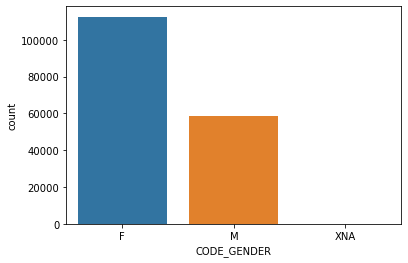

In [480]:
#可視化
#CODE_GENDER
sns.countplot(data = eda4, x = 'CODE_GENDER')
plt.show()

In [50]:
eda4.loc[eda4['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = 'F'
eda4_test.loc[eda4_test['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = 'F'

eda4_test['CODE_GENDER'].value_counts()



F    39916
M    21584
Name: CODE_GENDER, dtype: int64

In [482]:
eda4.head()

,CODE_GENDER,AMT_ANNUITY,DAYS_BIRTH
0,F,36328.5,-9233
1,F,16893.0,-20148
2,F,18256.5,-18496
3,F,8901.0,-24177
4,M,21546.0,-10685


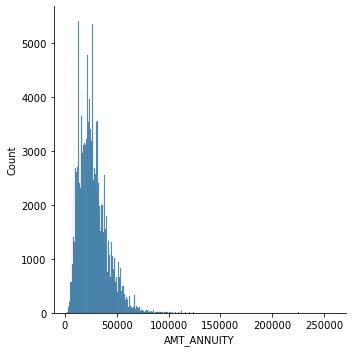

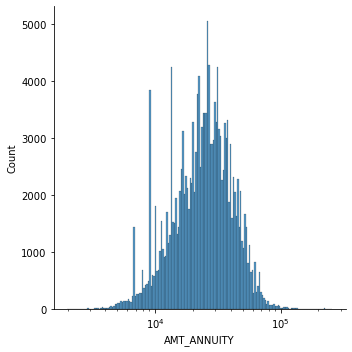

In [483]:
#可視化
#AMT_ANNUITY
sns.displot(data = eda4, x = 'AMT_ANNUITY')
sns.displot(data = eda4, x = 'AMT_ANNUITY', log_scale = 10)
plt.show()

In [484]:
eda4['AMT_ANNUITY'].mean()

27127.500700950957

In [51]:
eda4 = eda4.fillna({'AMT_ANNUITY':27127})
eda4_test = eda4_test.fillna({'AMT_ANNUITY':27127})

In [521]:
eda4_test.isnull().sum()

CODE_GENDER    0
AMT_ANNUITY    0
DAYS_BIRTH     0
dtype: int64

In [52]:
eda3_test.isnull().sum().sum()

0

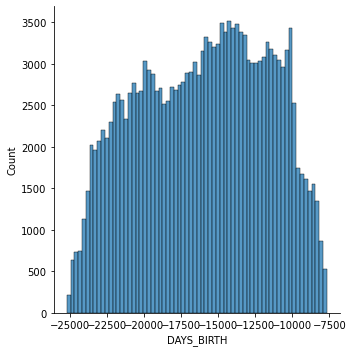

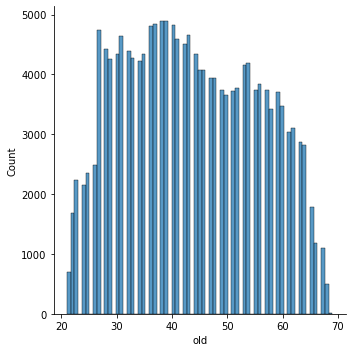

In [313]:
#可視化
#AMT_ANNUITY
sns.displot(data = eda4, x = 'DAYS_BIRTH')
sns.displot(data = eda4, x = 'old')
plt.show()

In [53]:
#加工
eda4['old'] = np.floor(eda4['DAYS_BIRTH']/(-365))
eda4_test['old'] = np.floor(eda4_test['DAYS_BIRTH']/(-365))
eda4_test.head(3)

,CODE_GENDER,AMT_ANNUITY,DAYS_BIRTH,old
0,F,28233.0,-12108,33.0
1,F,16069.5,-17907,49.0
2,F,11236.5,-15221,41.0


In [54]:
eda4['old'].unique()

array([25., 55., 50., 66., 29., 46., 39., 23., 40., 48., 47., 49., 57.,
       45., 35., 32., 33., 44., 59., 41., 36., 52., 27., 26., 60., 30.,
       64., 31., 56., 37., 53., 38., 58., 63., 54., 43., 28., 65., 22.,
       34., 42., 51., 61., 62., 67., 21., 24., 68., 69.])

In [55]:
# oldをグループ分け
eda4["old"] = eda4["old"] // 10
eda4_test["old"] = eda4_test["old"] // 10
eda4_test["old"].unique()

array([3., 4., 5., 2., 6.])

In [56]:
# oldをOne Hot Encoding
eda4_old_ohe = pd.get_dummies(eda4["old"]).add_prefix("old")
eda4_test_old_ohe = pd.get_dummies(eda4_test["old"]).add_prefix("old")

eda4 = pd.concat([eda4, eda4_old_ohe], axis=1)
eda4_test = pd.concat([eda4_test, eda4_test_old_ohe], axis=1)

eda4.drop('old', axis=1, inplace=True)
eda4_test.drop('old', axis=1, inplace=True)

eda4_test.head(5)

,CODE_GENDER,AMT_ANNUITY,DAYS_BIRTH,old2.0,old3.0,old4.0,old5.0,old6.0
0,F,28233.0,-12108,0,1,0,0,0
1,F,16069.5,-17907,0,0,1,0,0
2,F,11236.5,-15221,0,0,1,0,0
3,F,22500.0,-11217,0,1,0,0,0
4,F,26640.0,-11415,0,1,0,0,0


In [57]:
# CODE_GENDERをOne Hot Encoding

eda4_CODE_GENDER_ohe = pd.get_dummies(eda4["CODE_GENDER"]).add_prefix("CODE_GENDER")
eda4_test_CODE_GENDER_ohe = pd.get_dummies(eda4_test["CODE_GENDER"]).add_prefix("CODE_GENDER")

eda4 = pd.concat([eda4, eda4_CODE_GENDER_ohe], axis=1)
eda4_test = pd.concat([eda4_test, eda4_test_CODE_GENDER_ohe], axis=1)

eda4.drop('CODE_GENDER', axis=1, inplace=True)
eda4_test.drop('CODE_GENDER', axis=1, inplace=True)

eda4_test.head(5)

,AMT_ANNUITY,DAYS_BIRTH,old2.0,old3.0,old4.0,old5.0,old6.0,CODE_GENDERF,CODE_GENDERM
0,28233.0,-12108,0,1,0,0,0,1,0
1,16069.5,-17907,0,0,1,0,0,1,0
2,11236.5,-15221,0,0,1,0,0,1,0
3,22500.0,-11217,0,1,0,0,0,1,0
4,26640.0,-11415,0,1,0,0,0,1,0


In [528]:
eda4_test.isnull().sum()

AMT_ANNUITY     0
DAYS_BIRTH      0
old2.0          0
old3.0          0
old4.0          0
old5.0          0
old6.0          0
CODE_GENDERF    0
CODE_GENDERM    0
dtype: int64

In [58]:
#最終4データ
eda4.drop('DAYS_BIRTH', axis = 1, inplace = True)
eda4_test.drop('DAYS_BIRTH', axis = 1, inplace = True)


In [530]:
eda4.head()

,AMT_ANNUITY,old2.0,old3.0,old4.0,old5.0,old6.0,CODE_GENDERF,CODE_GENDERM
0,36328.5,1,0,0,0,0,1,0
1,16893.0,0,0,0,1,0,1,0
2,18256.5,0,0,0,1,0,1,0
3,8901.0,0,0,0,0,1,1,0
4,21546.0,1,0,0,0,0,0,1


In [59]:
eda4_test.isnull().sum().sum()

0

In [60]:
eda4 = pd.concat([eda3, eda4], axis = 1)
eda4_test = pd.concat([eda3_test, eda4_test], axis = 1)

In [61]:
eda4 = eda4.drop("TARGET", axis = 1)

In [62]:
eda4['TARGET'] = train['TARGET']

In [63]:
eda4['TARGET']

0         0
1         0
2         0
3         0
4         1
         ..
171197    0
171198    0
171199    0
171200    0
171201    0
Name: TARGET, Length: 171202, dtype: int64

In [536]:
eda4.head()

,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,EXT_SOURCE_2,ORGANIZATION_TYPE,OWN_CAR_AGE_0.0,OWN_CAR_AGE_1.0,OWN_CAR_AGE_2.0,OWN_CAR_AGE_3.0,OWN_CAR_AGE_4.0,OWN_CAR_AGE_5.0,...,CNT_FAM_MEMBERS7.0,AMT_ANNUITY,old2.0,old3.0,old4.0,old5.0,old6.0,CODE_GENDERF,CODE_GENDERM,TARGET
0,0,112500.0,0.372591,4991,0,0,0,0,0,0,...,0,36328.5,1,0,0,0,0,1,0,0
1,0,225000.0,0.449567,30898,0,0,0,0,0,0,...,0,16893.0,0,0,0,1,0,1,0,0
2,0,54000.0,0.569503,1185,0,0,0,0,0,0,...,0,18256.5,0,0,0,1,0,1,0,0
3,0,67500.0,0.105235,30898,0,0,0,0,0,0,...,0,8901.0,0,0,0,0,1,1,0,0
4,0,157500.0,0.202490,37943,0,0,0,0,0,0,...,0,21546.0,1,0,0,0,0,0,1,1


In [557]:
# 目的変数と説明変数に分割
X = eda4.drop("TARGET", axis=1).values
y = eda4["TARGET"].values
X_test = eda4_test.values

In [564]:
np.size(X_test,1)

80

In [559]:
# 標準化
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
X_test_std = sc.transform(X_test)

In [562]:
# 訓練データと評価データに分割
X_train, X_valid, y_train, y_valid = train_test_split(X_std, y, test_size=0.3, stratify=y, random_state=1)

In [414]:
pd.DataFrame(X_train)[pd.DataFrame(X_train).isna()]

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [569]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 1)
lr.fit(X_train, y_train)

lr_train_pred = lr.predict_proba(X_train)[:, 1]
lr_valid_pred = lr.predict_proba(X_valid)[:, 1]
print(f'Train Score: {roc_auc_score(y_train, lr_train_pred)}')
print(f'Valid Score: {roc_auc_score(y_valid, lr_valid_pred)}')





Train Score: 0.6997161483485506
Valid Score: 0.6947718044627478


In [565]:
np.size(X_train,0)
np.size(X_train,1)

80

In [568]:
#MLPClassifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state = 1)
mlp.fit(X_train, y_train)

mlp_train_pred = mlp.predict_proba(X_train)[:, 1]
mlp_valid_pred = mlp.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, mlp_train_pred)}")
print(f"Test Score: {roc_auc_score(y_valid, mlp_valid_pred)}")


Train Score: 0.7712388985360641
Test Score: 0.6626030946386166


In [570]:
# XGBClassifier
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state= 1)
xgb.fit(X_train, y_train)

xgb_train_pred = xgb.predict_proba(X_train)[:, 1]
xgb_valid_pred = xgb.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, xgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, xgb_valid_pred)}")

Train Score: 0.8341912071522228
Valid Score: 0.6963289141506055


In [571]:
# LGBMClassfier
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state = 1)
lgb.fit(X_train, y_train)

lgb_train_pred = lgb.predict_proba(X_train)[:, 1]
lgb_valid_pred = lgb.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, lgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, lgb_valid_pred)}")

Train Score: 0.7790290353936631
Valid Score: 0.708121920647198


In [572]:
train_pred = (lr_train_pred + mlp_train_pred + lgb_train_pred + xgb_train_pred)/4
valid_pred = (lr_valid_pred + mlp_valid_pred + lgb_valid_pred + xgb_valid_pred)/4

print(f"Train Score: {roc_auc_score(y_train, train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, valid_pred)}")

Train Score: 0.8039138099370924
Valid Score: 0.7054663216815811


In [567]:
pred = mlp.predict_proba(X_test)[:, 1]

## 自己的5

In [76]:
#３つに絞る
features5 = ['DAYS_EMPLOYED', 'FLAG_OWN_REALTY', 'EXT_SOURCE_3']
eda5 = train[features5]

eda5_test = test[features5]

In [77]:
eda5.head(5)

,DAYS_EMPLOYED,FLAG_OWN_REALTY,EXT_SOURCE_3
0,-878,N,NaN
1,365243,Y,0.553165
2,-523,Y,NaN
3,365243,Y,0.767523
4,-697,N,0.669057


In [78]:
print(eda5.isnull().sum())
print(eda5.isnull().sum())
print(eda5.shape)

DAYS_EMPLOYED          0
FLAG_OWN_REALTY    34241
EXT_SOURCE_3       54586
dtype: int64
DAYS_EMPLOYED          0
FLAG_OWN_REALTY    34241
EXT_SOURCE_3       54586
dtype: int64
(171202, 3)


In [79]:
eda5.corr()

,DAYS_EMPLOYED,EXT_SOURCE_3
DAYS_EMPLOYED,1.000000,0.116883
EXT_SOURCE_3,0.116883,1.000000


In [80]:
eda5['TARGET'] = train['TARGET']

<AxesSubplot:>

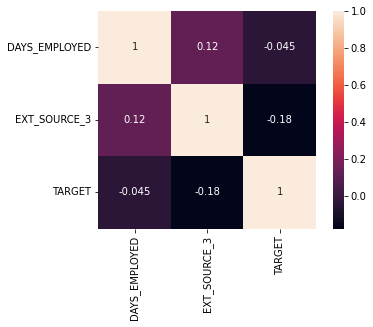

In [81]:
sns.heatmap(eda5.corr(),square=True,annot=True)

<AxesSubplot:xlabel='FLAG_OWN_REALTY', ylabel='count'>

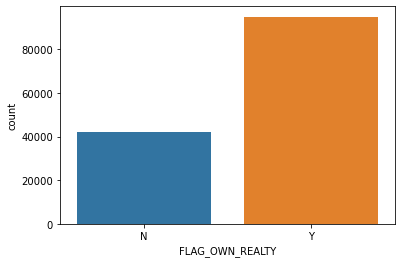

In [82]:
#データ可視化
sns.countplot(data = eda5, x = 'FLAG_OWN_REALTY')

In [83]:
#データ加工
eda5.fillna({'FLAG_OWN_REALTY':'Y'},inplace = True)
eda5_test.fillna({'FLAG_OWN_REALTY':'Y'},inplace = True)

In [84]:
# FLAG_OWN_REALTYをOne Hot Encoding
eda5_FLAG_OWN_REALTY_ohe = pd.get_dummies(eda5["FLAG_OWN_REALTY"]).add_prefix("FLAG_OWN_REALTY")
eda5_test_FLAG_OWN_REALTY_ohe = pd.get_dummies(eda5_test["FLAG_OWN_REALTY"]).add_prefix("FLAG_OWN_REALTY")

eda5 = pd.concat([eda5, eda5_FLAG_OWN_REALTY_ohe], axis=1)
eda5_test = pd.concat([eda5_test, eda5_test_FLAG_OWN_REALTY_ohe], axis=1)

eda5.drop('FLAG_OWN_REALTY', axis=1, inplace=True)
eda5_test.drop('FLAG_OWN_REALTY', axis=1, inplace=True)

eda5_test.head(5)

,DAYS_EMPLOYED,EXT_SOURCE_3,FLAG_OWN_REALTYN,FLAG_OWN_REALTYY
0,-2372,NaN,1,0
1,-1712,NaN,1,0
2,-553,0.389339,0,1
3,-1438,0.217629,0,1
4,-2362,NaN,0,1


In [85]:
eda5_test.isnull().sum()

DAYS_EMPLOYED           0
EXT_SOURCE_3        19690
FLAG_OWN_REALTYN        0
FLAG_OWN_REALTYY        0
dtype: int64

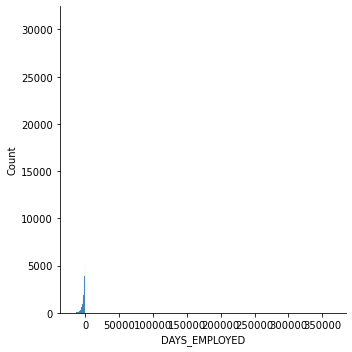

In [86]:
#可視化
sns.displot(data = eda5, x = 'DAYS_EMPLOYED')

In [87]:
#データ加工
eda5.loc[eda5["DAYS_EMPLOYED"] >= 350000, "DAYS_EMPLOYED"] = np.nan
eda5_test.loc[eda5_test["DAYS_EMPLOYED"] >= 350000, "DAYS_EMPLOYED"] = np.nan


In [88]:
eda5["DAYS_EMPLOYED"].isnull().sum()

30898

In [89]:
eda5["DAYS_EMPLOYED"].mean()

-2388.5831052571557

In [90]:
eda5["DAYS_EMPLOYED"].mode()

0   -200.0
dtype: float64

<AxesSubplot:xlabel='DAYS_EMPLOYED'>

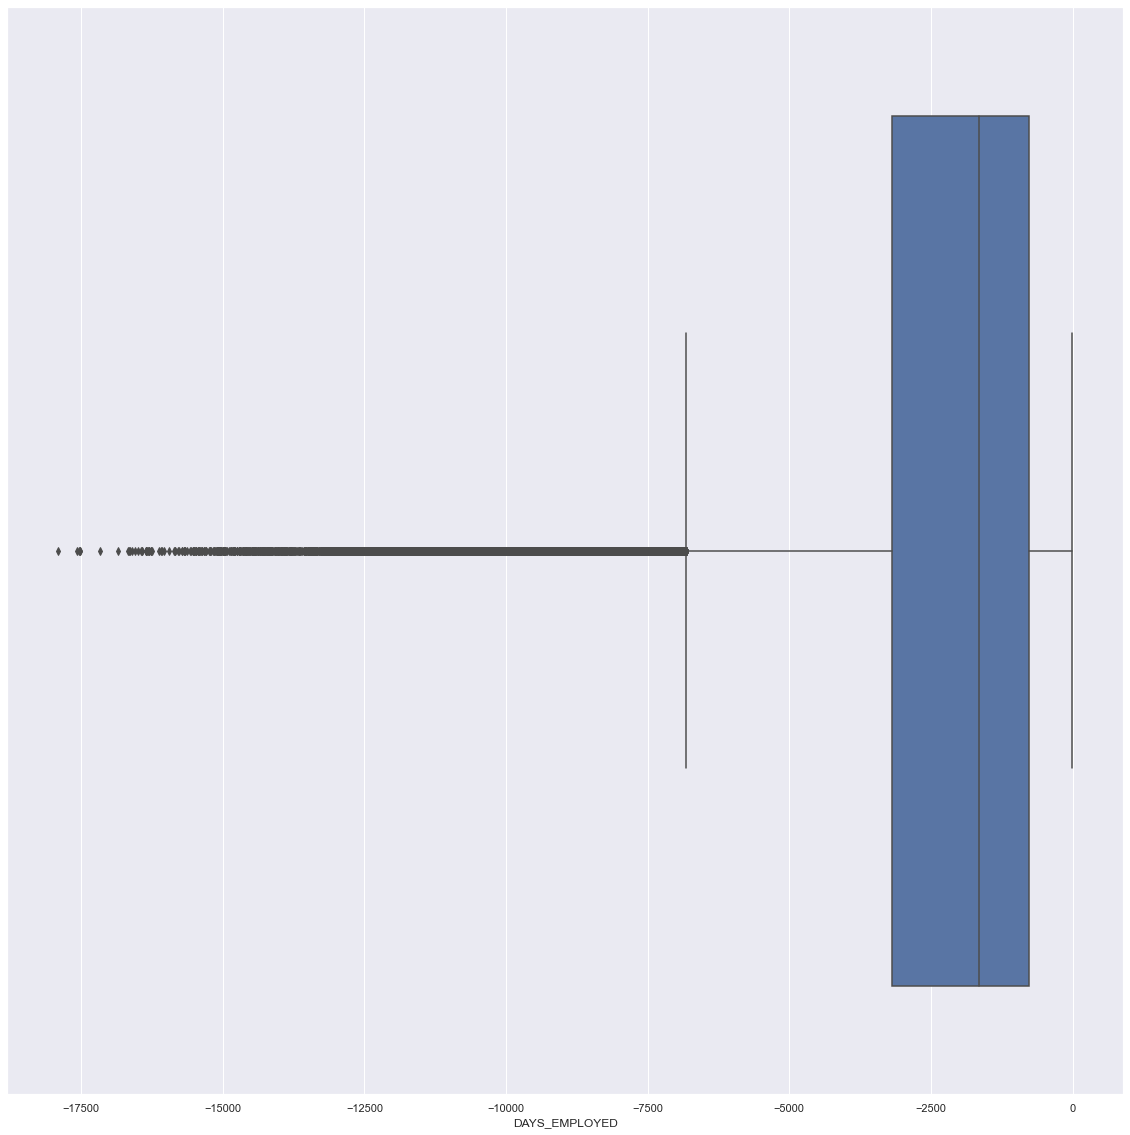

In [843]:
sns.boxplot(data = eda5, x = 'DAYS_EMPLOYED')

In [91]:
eda5 = eda5.fillna({'DAYS_EMPLOYED':-2388.5831052571557})
eda5_test = eda5_test.fillna({'DAYS_EMPLOYED':-2388.5831052571557})

In [92]:
eda5['YEARS_EMPLOYED'] = np.floor(eda5['DAYS_EMPLOYED']/(-365))
eda5_test['YEARS_EMPLOYED'] = np.floor(eda5_test['DAYS_EMPLOYED']/(-365))

In [93]:
eda5.head()

,DAYS_EMPLOYED,EXT_SOURCE_3,TARGET,FLAG_OWN_REALTYN,FLAG_OWN_REALTYY,YEARS_EMPLOYED
0,-878.000000,NaN,0,1,0,2.0
1,-2388.583105,0.553165,0,0,1,6.0
2,-523.000000,NaN,0,0,1,1.0
3,-2388.583105,0.767523,0,0,1,6.0
4,-697.000000,0.669057,1,1,0,1.0


<AxesSubplot:xlabel='DAYS_EMPLOYED'>

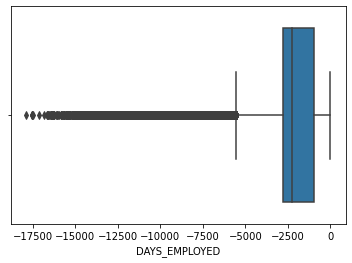

In [73]:
sns.boxplot(data = eda5, x = 'DAYS_EMPLOYED')

In [94]:
a = eda5[eda5['DAYS_EMPLOYED'] >= 350000]

In [95]:
a.shape

(0, 6)

In [96]:
eda5['YEARS_EMPLOYED'].unique()

array([ 2.,  6.,  1., 11., 14.,  5.,  0.,  9., 15.,  7.,  4.,  3., 10.,
       12., 17., 13., 33., 23.,  8., 16., 22., 25., 19., 29., 26., 20.,
       18., 27., 24., 30., 36., 28., 31., 21., 32., 38., 35., 34., 40.,
       44., 41., 39., 49., 37., 43., 48., 42., 45., 46., 47.])

In [97]:
# YEARS_EMPLOYEDをグループ分け
eda5["YEARS_EMPLOYED"] = eda5["YEARS_EMPLOYED"] // 5
eda5_test["YEARS_EMPLOYED"] = eda5_test["YEARS_EMPLOYED"] // 5
eda5_test["YEARS_EMPLOYED"].unique()

array([1., 0., 2., 3., 4., 5., 6., 7., 8., 9.])

In [98]:
len(eda5_test["YEARS_EMPLOYED"].unique())

10

In [99]:
# YEARS_EMPLOYEDをOne Hot Encoding
eda5_YEARS_EMPLOYED_ohe = pd.get_dummies(eda5["YEARS_EMPLOYED"]).add_prefix("YEARS_EMPLOYED")
eda5_test_YEARS_EMPLOYED_ohe = pd.get_dummies(eda5_test["YEARS_EMPLOYED"]).add_prefix("YEARS_EMPLOYED")

eda5 = pd.concat([eda5, eda5_YEARS_EMPLOYED_ohe], axis=1)
eda5_test = pd.concat([eda5_test, eda5_test_YEARS_EMPLOYED_ohe], axis=1)

eda5.drop('YEARS_EMPLOYED', axis=1, inplace=True)
eda5_test.drop('YEARS_EMPLOYED', axis=1, inplace=True)

eda5_test.head(5)

,DAYS_EMPLOYED,EXT_SOURCE_3,FLAG_OWN_REALTYN,FLAG_OWN_REALTYY,YEARS_EMPLOYED0.0,YEARS_EMPLOYED1.0,YEARS_EMPLOYED2.0,YEARS_EMPLOYED3.0,YEARS_EMPLOYED4.0,YEARS_EMPLOYED5.0,YEARS_EMPLOYED6.0,YEARS_EMPLOYED7.0,YEARS_EMPLOYED8.0,YEARS_EMPLOYED9.0
0,-2372.0,NaN,1,0,0,1,0,0,0,0,0,0,0,0
1,-1712.0,NaN,1,0,1,0,0,0,0,0,0,0,0,0
2,-553.0,0.389339,0,1,1,0,0,0,0,0,0,0,0,0
3,-1438.0,0.217629,0,1,1,0,0,0,0,0,0,0,0,0
4,-2362.0,NaN,0,1,0,1,0,0,0,0,0,0,0,0


In [100]:
eda5.drop('DAYS_EMPLOYED', axis=1, inplace=True)
eda5_test.drop('DAYS_EMPLOYED', axis=1, inplace=True)

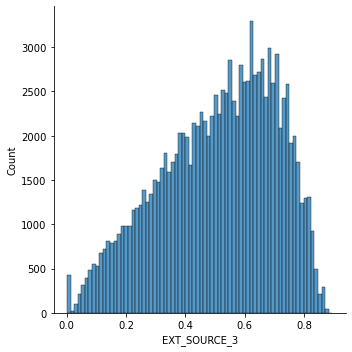

In [642]:
#データ可視化
sns.displot(data = eda5, x = 'EXT_SOURCE_3')

In [643]:
print(eda5['EXT_SOURCE_3'].mean())
print(eda5['EXT_SOURCE_3'].mode())

0.5111771488926778
0    0.7463
dtype: float64


In [101]:
#データ加工
eda5.fillna({'EXT_SOURCE_3':0.7463}, inplace = True)
eda5_test.fillna({'EXT_SOURCE_3':0.7463}, inplace = True)

In [102]:
eda5.isnull().sum()

EXT_SOURCE_3         0
TARGET               0
FLAG_OWN_REALTYN     0
FLAG_OWN_REALTYY     0
YEARS_EMPLOYED0.0    0
YEARS_EMPLOYED1.0    0
YEARS_EMPLOYED2.0    0
YEARS_EMPLOYED3.0    0
YEARS_EMPLOYED4.0    0
YEARS_EMPLOYED5.0    0
YEARS_EMPLOYED6.0    0
YEARS_EMPLOYED7.0    0
YEARS_EMPLOYED8.0    0
YEARS_EMPLOYED9.0    0
dtype: int64

In [103]:
print(eda4.isnull().sum().sum())
print(eda4_test.isnull().sum().sum())

0
0


In [104]:
print(eda4.shape)
print(eda4_test.shape)

(171202, 58)
(61500, 57)


In [105]:
#最終5データ
eda5 = pd.concat([eda4, eda5], axis = 1)
eda5_test = pd.concat([eda4_test, eda5_test], axis = 1)

In [855]:
# 目的変数と説明変数に分割
X = eda5.drop("TARGET", axis=1).values
y = eda5["TARGET"].values
X_test = eda5_test.values

In [856]:
# 標準化
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
X_test_std = sc.transform(X_test)

In [857]:
# 訓練データと評価データに分割
X_train, X_valid, y_train, y_valid = train_test_split(X_std, y, test_size=0.3, stratify=y, random_state=1)

In [858]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 1)
lr.fit(X_train, y_train)

lr_train_pred = lr.predict_proba(X_train)[:, 1]
lr_valid_pred = lr.predict_proba(X_valid)[:, 1]
print(f'Train Score: {roc_auc_score(y_train, lr_train_pred)}')
print(f'Valid Score: {roc_auc_score(y_valid, lr_valid_pred)}')






Train Score: 0.7219556956119918
Valid Score: 0.7176210639315109


In [859]:
#MLPClassifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state = 1)
mlp.fit(X_train, y_train)

mlp_train_pred = mlp.predict_proba(X_train)[:, 1]
mlp_valid_pred = mlp.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, mlp_train_pred)}")
print(f"Test Score: {roc_auc_score(y_valid, mlp_valid_pred)}")



Train Score: 0.8156095065557867
Test Score: 0.6728992586028779


In [860]:
# XGBClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1)
xgb.fit(X_train, y_train)
xgb_train_pred = xgb.predict_proba(X_train)[:,1]
xgb_valid_pred = xgb.predict_proba(X_valid)[:,1]
print(f"Train Score: {roc_auc_score(y_train, xgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, xgb_valid_pred)}")

Train Score: 0.8529884818873993
Valid Score: 0.7289639454008944


In [861]:
# LGBMClassfier
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state = 1)
lgb.fit(X_train, y_train)

lgb_train_pred = lgb.predict_proba(X_train)[:, 1]
lgb_valid_pred = lgb.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, lgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, lgb_valid_pred)}")

Train Score: 0.8025588877597495
Valid Score: 0.7393405089945059


In [862]:
train_pred = (lr_train_pred + mlp_train_pred + lgb_train_pred + xgb_train_pred)/4
valid_pred = (lr_valid_pred + mlp_valid_pred + lgb_valid_pred + xgb_valid_pred)/4

print(f"Train Score: {roc_auc_score(y_train, train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, valid_pred)}")

Train Score: 0.8347690440937123
Valid Score: 0.7354014303404912


In [662]:
#予測値の作成
pred1 = lr.predict_proba(X_test)[:, 1]
pred2 = mlp.predict_proba(X_test)[:, 1]
pred3 = xgb.predict_proba(X_test)[:, 1]
pred4 = lgb.predict_proba(X_test)[:, 1]
pred = (pred1 + pred2 + pred3 + pred4)/4

## 多重共線性解消

In [699]:
eda6 = train[features1 + features2 + features3 + features4 + features5]
eda6_test = test[features1 + features2 + features3 + features4 + features5]

<AxesSubplot:>

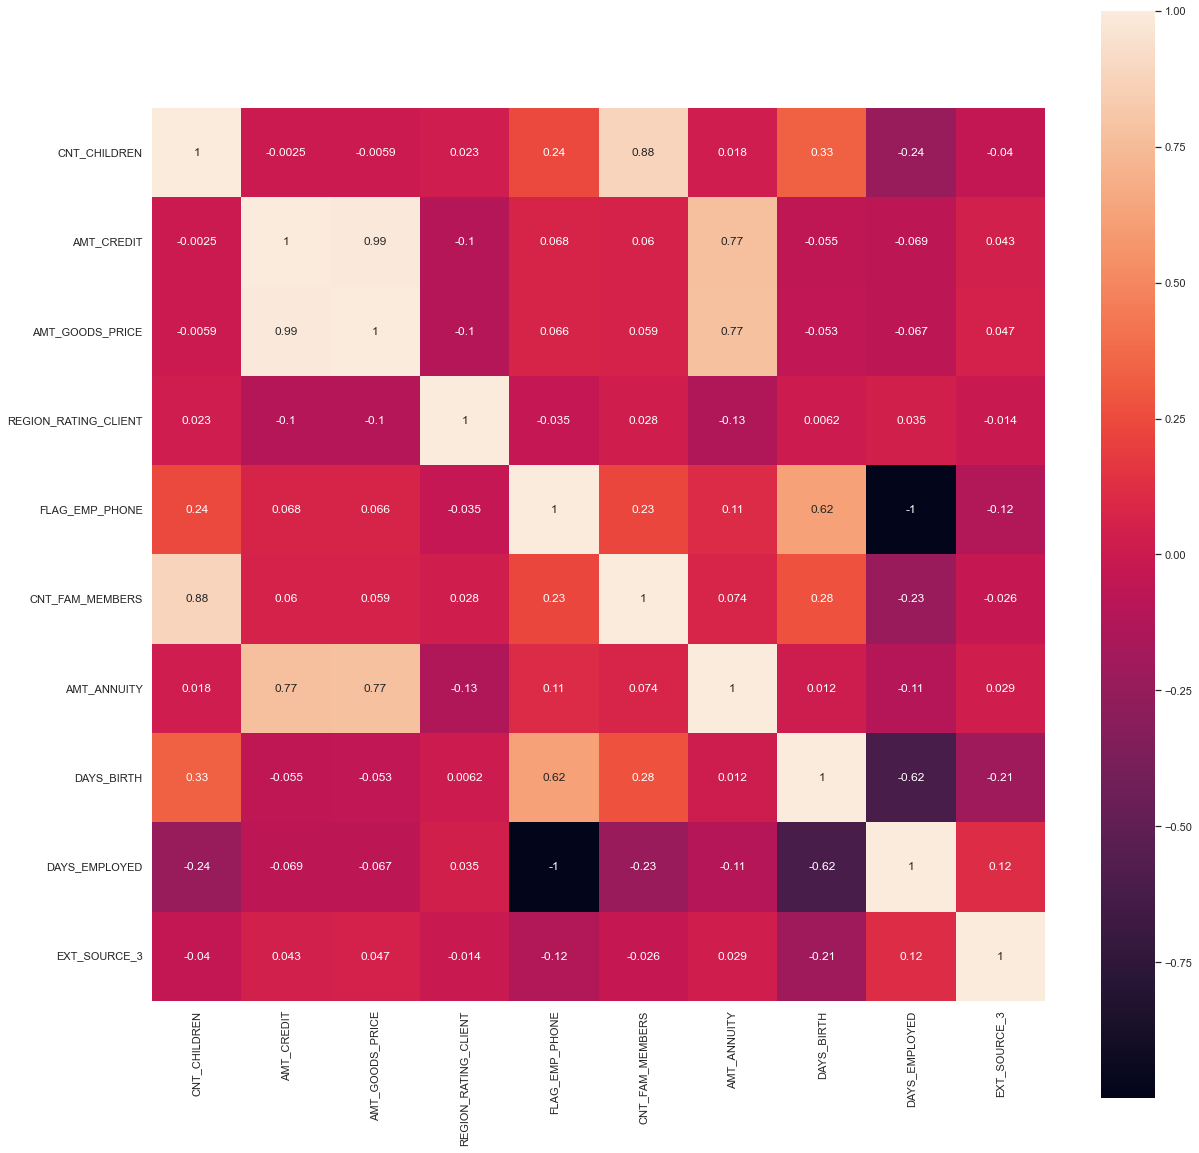

In [676]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(cor_check.corr(),square=True,annot=True)

In [700]:
cha = ['CNT_CHILDREN','AMT_ANNUITY','AMT_GOODS_PRICE','FLAG_EMP_PHONE','DAYS_BIRTH']

In [706]:
eda6_1 = eda6.drop(cha, axis = 1)
eda6_1_test = eda6_test.drop(cha, axis = 1)

In [702]:
print(eda6.shape)
print(eda6_1.shape)

(171202, 14)
(171202, 9)


<AxesSubplot:>

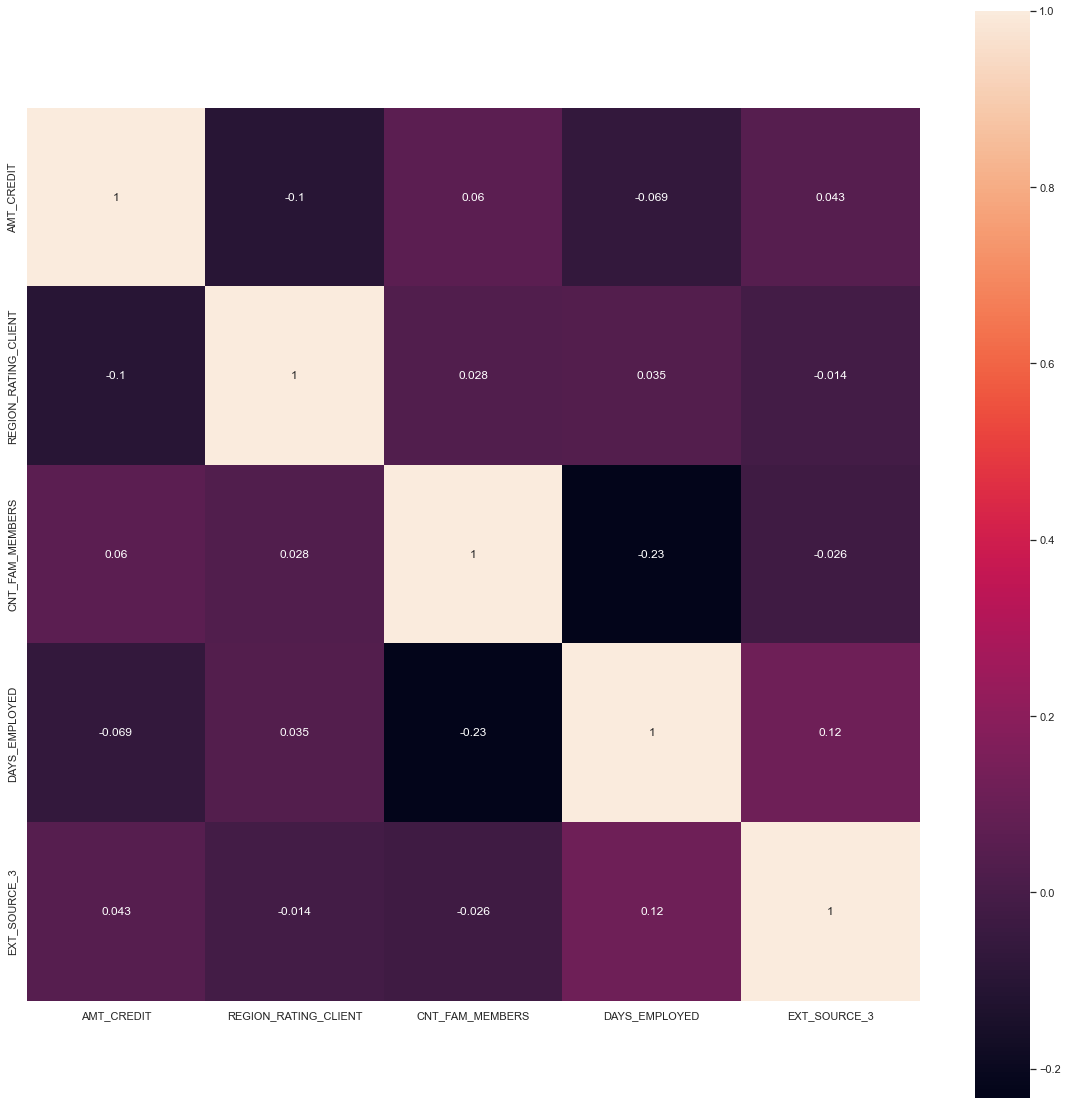

In [703]:
sns.heatmap(eda6_1.corr(), square = True, annot = True)

In [704]:
eda6_1.head()

,AMT_CREDIT,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,CODE_GENDER,DAYS_EMPLOYED,FLAG_OWN_REALTY,EXT_SOURCE_3
0,755190.0,Core staff,Higher education,2,2.0,F,-878,N,NaN
1,585000.0,NaN,Secondary / secondary special,2,2.0,F,365243,Y,0.553165
2,334152.0,Core staff,Secondary / secondary special,2,2.0,F,-523,Y,NaN
3,152820.0,NaN,Lower secondary,3,1.0,F,365243,Y,0.767523
4,271066.5,Drivers,Secondary / secondary special,3,2.0,M,-697,N,0.669057


In [707]:
#OCCUPATION_TYPE
eda6_1 = eda6_1.fillna({'OCCUPATION_TYPE':'unknow'})
eda6_1_test = eda6_1_test.fillna({'OCCUPATION_TYPE':'unknow'})


eda6_1_OCCUPATION_TYPE_ohe = pd.get_dummies(eda6_1['OCCUPATION_TYPE']).add_prefix('OCCUPATION_TYPE')
eda6_1_test_OCCUPATION_TYPE_ohe = pd.get_dummies(eda6_1_test['OCCUPATION_TYPE']).add_prefix('OCCUPATION_TYPE')

eda6_1 = pd.concat([eda6_1, eda6_1_OCCUPATION_TYPE_ohe], axis = 1)
eda6_1_test = pd.concat([eda6_1_test, eda6_1_test_OCCUPATION_TYPE_ohe], axis = 1)

eda6_1.drop('OCCUPATION_TYPE', axis = 1, inplace = True)
eda6_1_test.drop('OCCUPATION_TYPE', axis = 1, inplace = True)


eda6_1.head(5)




,AMT_CREDIT,NAME_EDUCATION_TYPE,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,CODE_GENDER,DAYS_EMPLOYED,FLAG_OWN_REALTY,EXT_SOURCE_3,OCCUPATION_TYPEAccountants,OCCUPATION_TYPECleaning staff,...,OCCUPATION_TYPELow-skill Laborers,OCCUPATION_TYPEManagers,OCCUPATION_TYPEMedicine staff,OCCUPATION_TYPEPrivate service staff,OCCUPATION_TYPERealty agents,OCCUPATION_TYPESales staff,OCCUPATION_TYPESecretaries,OCCUPATION_TYPESecurity staff,OCCUPATION_TYPEWaiters/barmen staff,OCCUPATION_TYPEunknow
0,755190.0,Higher education,2,2.0,F,-878,N,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
1,585000.0,Secondary / secondary special,2,2.0,F,365243,Y,0.553165,0,0,...,0,0,0,0,0,0,0,0,0,1
2,334152.0,Secondary / secondary special,2,2.0,F,-523,Y,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
3,152820.0,Lower secondary,3,1.0,F,365243,Y,0.767523,0,0,...,0,0,0,0,0,0,0,0,0,1
4,271066.5,Secondary / secondary special,3,2.0,M,-697,N,0.669057,0,0,...,0,0,0,0,0,0,0,0,0,0


In [708]:
#データの加工
eda6_1_NAME_EDUCATION_TYPE_ohe = pd.get_dummies(eda6_1['NAME_EDUCATION_TYPE']).add_prefix('NAME_EDUCATION_TYPE')
eda6_1_test_NAME_EDUCATION_TYPE_ohe = pd.get_dummies(eda6_1_test['NAME_EDUCATION_TYPE']).add_prefix('NAME_EDUCATION_TYPE')

eda6_1 = pd.concat([eda6_1, eda6_1_NAME_EDUCATION_TYPE_ohe], axis = 1)
eda6_1_test = pd.concat([eda6_1_test, eda6_1_test_NAME_EDUCATION_TYPE_ohe], axis = 1)

eda6_1.drop('NAME_EDUCATION_TYPE', axis = 1, inplace = True)
eda6_1_test.drop('NAME_EDUCATION_TYPE', axis = 1, inplace = True)


eda6_1.shape




(171202, 31)

In [709]:
#データ加工
eda6_1_REGION_RATING_CLIENT_ohe = pd.get_dummies(eda6_1['REGION_RATING_CLIENT']).add_prefix('REGION_RATING_CLIENT')
eda6_1_test_REGION_RATING_CLIENT_ohe = pd.get_dummies(eda6_1_test['REGION_RATING_CLIENT']).add_prefix('REGION_RATING_CLIENT')

eda6_1 = pd.concat([eda6_1, eda6_1_REGION_RATING_CLIENT_ohe], axis = 1)
eda6_1_test = pd.concat([eda6_1_test, eda6_1_test_REGION_RATING_CLIENT_ohe], axis = 1)

eda6_1.drop('REGION_RATING_CLIENT', axis = 1, inplace = True)
eda6_1_test.drop('REGION_RATING_CLIENT', axis = 1, inplace = True)


eda6_1.shape




(171202, 33)

In [710]:
#データ加工
#欠損値補完
eda6_1.loc[eda6_1["CNT_FAM_MEMBERS"] >= 7, "CNT_FAM_MEMBERS"] = 7
eda6_1_test.loc[eda6_1_test["CNT_FAM_MEMBERS"] >= 7, "CNT_FAM_MEMBERS"] = 7


eda6_1 = eda6_1.fillna({'CNT_FAM_MEMBERS': 2})
eda6_1_test = eda6_1_test.fillna({'CNT_FAM_MEMBERS': 2})

eda6_1_CNT_FAM_MEMBERS_ohe = pd.get_dummies(eda6_1['CNT_FAM_MEMBERS']).add_prefix('CNT_FAM_MEMBERS')
eda6_1_test_CNT_FAM_MEMBERS_ohe = pd.get_dummies(eda6_1_test['CNT_FAM_MEMBERS']).add_prefix('CNT_FAM_MEMBERS')

eda6_1 = pd.concat([eda6_1, eda6_1_CNT_FAM_MEMBERS_ohe], axis = 1)
eda6_1_test = pd.concat([eda6_1_test, eda6_1_test_CNT_FAM_MEMBERS_ohe], axis = 1)

eda6_1.drop('CNT_FAM_MEMBERS', axis = 1, inplace = True)
eda6_1_test.drop('CNT_FAM_MEMBERS', axis = 1, inplace = True)


eda6_1.shape





(171202, 39)

In [711]:
# CODE_GENDERをOne Hot Encoding

eda6_1.loc[eda6_1['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = 'F'
eda6_1_test.loc[eda6_1_test['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = 'F'

eda6_1_test['CODE_GENDER'].value_counts()



eda6_1_CODE_GENDER_ohe = pd.get_dummies(eda6_1["CODE_GENDER"]).add_prefix("CODE_GENDER")
eda6_1_test_CODE_GENDER_ohe = pd.get_dummies(eda6_1_test["CODE_GENDER"]).add_prefix("CODE_GENDER")

eda6_1 = pd.concat([eda6_1, eda6_1_CODE_GENDER_ohe], axis=1)
eda6_1_test = pd.concat([eda6_1_test, eda6_1_test_CODE_GENDER_ohe], axis=1)

eda6_1.drop('CODE_GENDER', axis=1, inplace=True)
eda6_1_test.drop('CODE_GENDER', axis=1, inplace=True)

eda6_1.shape

(171202, 40)

In [712]:
#データ加工
eda6_1.fillna({'EXT_SOURCE_3':0.7463}, inplace = True)
eda6_1_test.fillna({'EXT_SOURCE_3':0.7463}, inplace = True)

In [714]:
#データ加工
eda6_1.loc[eda6_1["DAYS_EMPLOYED"] >= 350000, "DAYS_EMPLOYED"] = np.nan
eda6_1_test.loc[eda6_1_test["DAYS_EMPLOYED"] >= 350000, "DAYS_EMPLOYED"] = np.nan

eda6_1 = eda6_1.fillna({'DAYS_EMPLOYED':-200})
eda6_1_test = eda6_1_test.fillna({'DAYS_EMPLOYED':-200})

eda6_1['YEARS_EMPLOYED'] = np.floor(eda6_1['DAYS_EMPLOYED']/(-365))
eda6_1_test['YEARS_EMPLOYED'] = np.floor(eda6_1_test['DAYS_EMPLOYED']/(-365))

# YEARS_EMPLOYEDをグループ分け
eda6_1["YEARS_EMPLOYED"] = eda6_1["YEARS_EMPLOYED"] // 5
eda6_1_test["YEARS_EMPLOYED"] = eda6_1_test["YEARS_EMPLOYED"] // 5
eda6_1_test["YEARS_EMPLOYED"].unique()

# YEARS_EMPLOYEDをOne Hot Encoding
eda6_1_YEARS_EMPLOYED_ohe = pd.get_dummies(eda6_1["YEARS_EMPLOYED"]).add_prefix("YEARS_EMPLOYED")
eda6_1_test_YEARS_EMPLOYED_ohe = pd.get_dummies(eda6_1_test["YEARS_EMPLOYED"]).add_prefix("YEARS_EMPLOYED")

eda6_1 = pd.concat([eda6_1, eda6_1_YEARS_EMPLOYED_ohe], axis=1)
eda6_1_test = pd.concat([eda6_1_test, eda6_1_test_YEARS_EMPLOYED_ohe], axis=1)

eda6_1.drop('YEARS_EMPLOYED', axis=1, inplace=True)
eda6_1_test.drop('YEARS_EMPLOYED', axis=1, inplace=True)

eda6_1_test.head(5)

eda6_1.drop('DAYS_EMPLOYED', axis=1, inplace=True)
eda6_1_test.drop('DAYS_EMPLOYED', axis=1, inplace=True)

In [715]:
#データ加工
eda6_1.fillna({'FLAG_OWN_REALTY':'Y'},inplace = True)
eda6_1_test.fillna({'FLAG_OWN_REALTY':'Y'},inplace = True)

# FLAG_OWN_REALTYをOne Hot Encoding
eda6_1_FLAG_OWN_REALTY_ohe = pd.get_dummies(eda6_1["FLAG_OWN_REALTY"]).add_prefix("FLAG_OWN_REALTY")
eda6_1_test_FLAG_OWN_REALTY_ohe = pd.get_dummies(eda6_1_test["FLAG_OWN_REALTY"]).add_prefix("FLAG_OWN_REALTY")

eda6_1 = pd.concat([eda6_1, eda6_1_FLAG_OWN_REALTY_ohe], axis=1)
eda6_1_test = pd.concat([eda6_1_test, eda6_1_test_FLAG_OWN_REALTY_ohe], axis=1)

eda6_1.drop('FLAG_OWN_REALTY', axis=1, inplace=True)
eda6_1_test.drop('FLAG_OWN_REALTY', axis=1, inplace=True)

print(eda6_1.shape)
print(eda6_1_test.shape)

(171202, 60)
(61500, 60)


In [716]:
eda6_1['TARGET'] = train['TARGET']

In [717]:
print(eda6_1.shape)
print(eda6_1_test.shape)

(171202, 61)
(61500, 60)


In [718]:
# 目的変数と説明変数に分割
X = eda6_1.drop("TARGET", axis=1).values
y = eda6_1["TARGET"].values
X_test = eda6_1_test.values

# 標準化
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
X_test_std = sc.transform(X_test)

# 訓練データと評価データに分割
X_train, X_valid, y_train, y_valid = train_test_split(X_std, y, test_size=0.3, stratify=y, random_state=1)

In [719]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 1)
lr.fit(X_train, y_train)

lr_train_pred = lr.predict_proba(X_train)[:, 1]
lr_valid_pred = lr.predict_proba(X_valid)[:, 1]
print(f'Train Score: {roc_auc_score(y_train, lr_train_pred)}')
print(f'Valid Score: {roc_auc_score(y_valid, lr_valid_pred)}')



Train Score: 0.663013378776618
Valid Score: 0.6634078776362443


In [720]:
#MLPClassifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state = 1)
mlp.fit(X_train, y_train)

mlp_train_pred = mlp.predict_proba(X_train)[:, 1]
mlp_valid_pred = mlp.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, mlp_train_pred)}")
print(f"Test Score: {roc_auc_score(y_valid, mlp_valid_pred)}")


Train Score: 0.746707174951064
Test Score: 0.6498277143501832


In [721]:
# XGBClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1)
xgb.fit(X_train, y_train)
xgb_train_pred = xgb.predict_proba(X_train)[:,1]
xgb_valid_pred = xgb.predict_proba(X_valid)[:,1]
print(f"Train Score: {roc_auc_score(y_train, xgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, xgb_valid_pred)}")

Train Score: 0.7859804797280083
Valid Score: 0.6884690247254466


In [722]:
# LGBMClassfier
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state = 1)
lgb.fit(X_train, y_train)

lgb_train_pred = lgb.predict_proba(X_train)[:, 1]
lgb_valid_pred = lgb.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, lgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, lgb_valid_pred)}")

Train Score: 0.7510914869789405
Valid Score: 0.6952125324624008


In [723]:
train_pred = (lr_train_pred + mlp_train_pred + lgb_train_pred + xgb_train_pred)/4
valid_pred = (lr_valid_pred + mlp_valid_pred + lgb_valid_pred + xgb_valid_pred)/4

print(f"Train Score: {roc_auc_score(y_train, train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, valid_pred)}")

Train Score: 0.7692121708180013
Valid Score: 0.6924290813047989


In [724]:
#予測値の作成
pred1 = lr.predict_proba(X_test)[:, 1]
pred2 = mlp.predict_proba(X_test)[:, 1]
pred3 = xgb.predict_proba(X_test)[:, 1]
pred4 = lgb.predict_proba(X_test)[:, 1]
pred = (pred1 + pred2 + pred3 + pred4)/4

## 自己的7

In [125]:
#３つに絞る
features7 = ['DAYS_ID_PUBLISH', 'REG_REGION_NOT_WORK_REGION', 'OBS_30_CNT_SOCIAL_CIRCLE']
eda7 = train[features7]

eda7_test = test[features7]

In [126]:
print(eda7.isnull().sum())
print(eda7_test.isnull().sum())

DAYS_ID_PUBLISH                 0
REG_REGION_NOT_WORK_REGION      0
OBS_30_CNT_SOCIAL_CIRCLE      560
dtype: int64
DAYS_ID_PUBLISH                 0
REG_REGION_NOT_WORK_REGION      0
OBS_30_CNT_SOCIAL_CIRCLE      181
dtype: int64


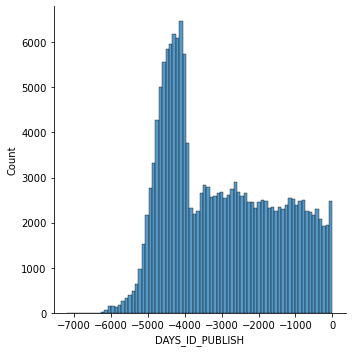

In [108]:
#data visualization
sns.displot(data = eda7, x = 'DAYS_ID_PUBLISH')


<AxesSubplot:xlabel='REG_REGION_NOT_WORK_REGION', ylabel='count'>

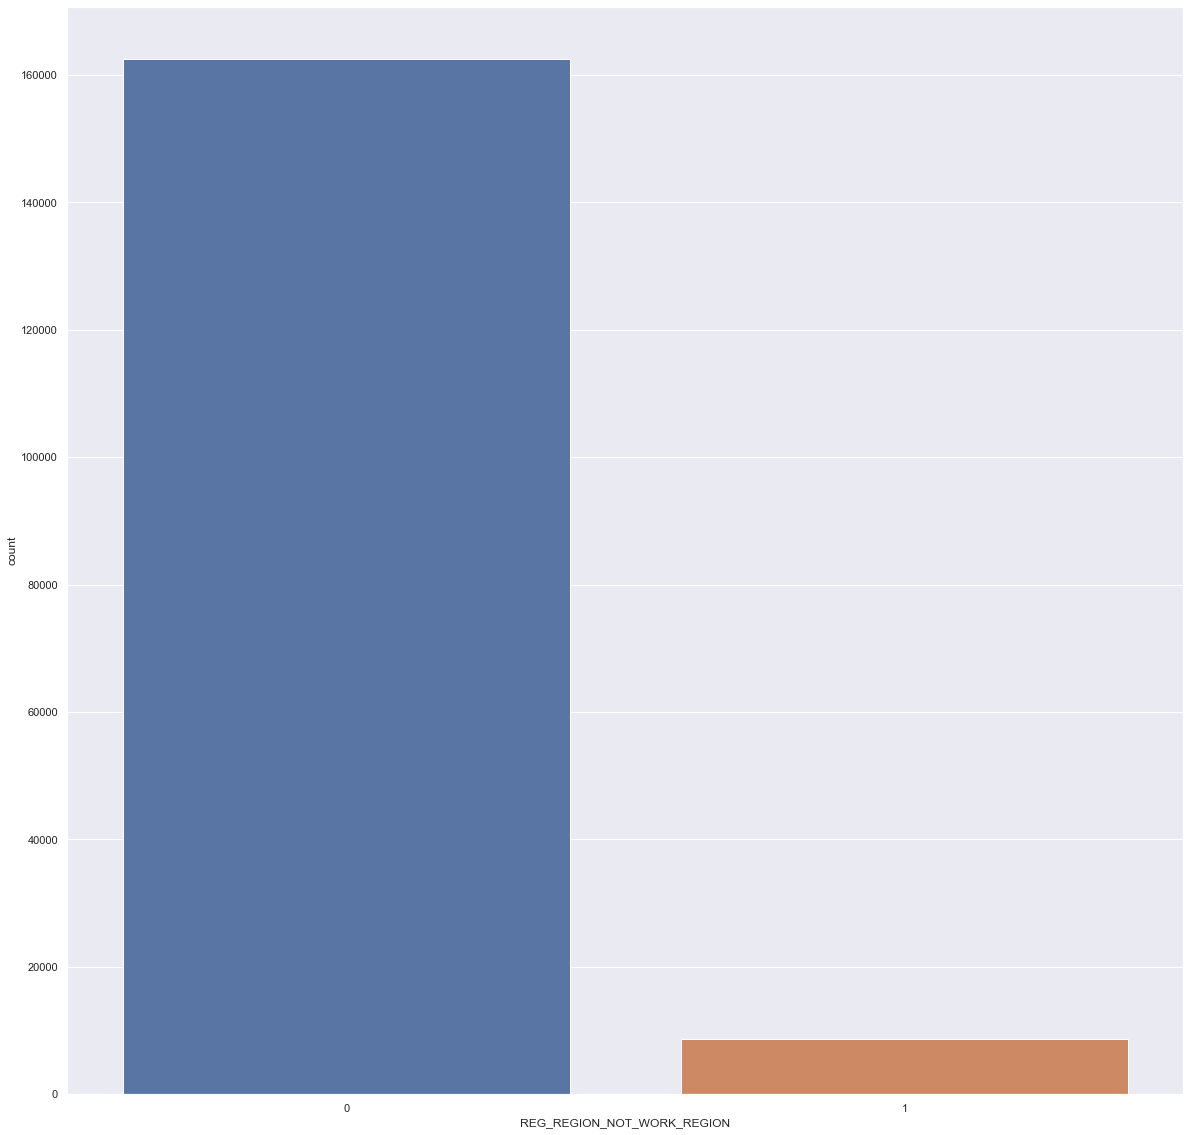

In [736]:
#data visualization
sns.countplot(data = eda7, x = 'REG_REGION_NOT_WORK_REGION')

<AxesSubplot:xlabel='OBS_30_CNT_SOCIAL_CIRCLE', ylabel='count'>

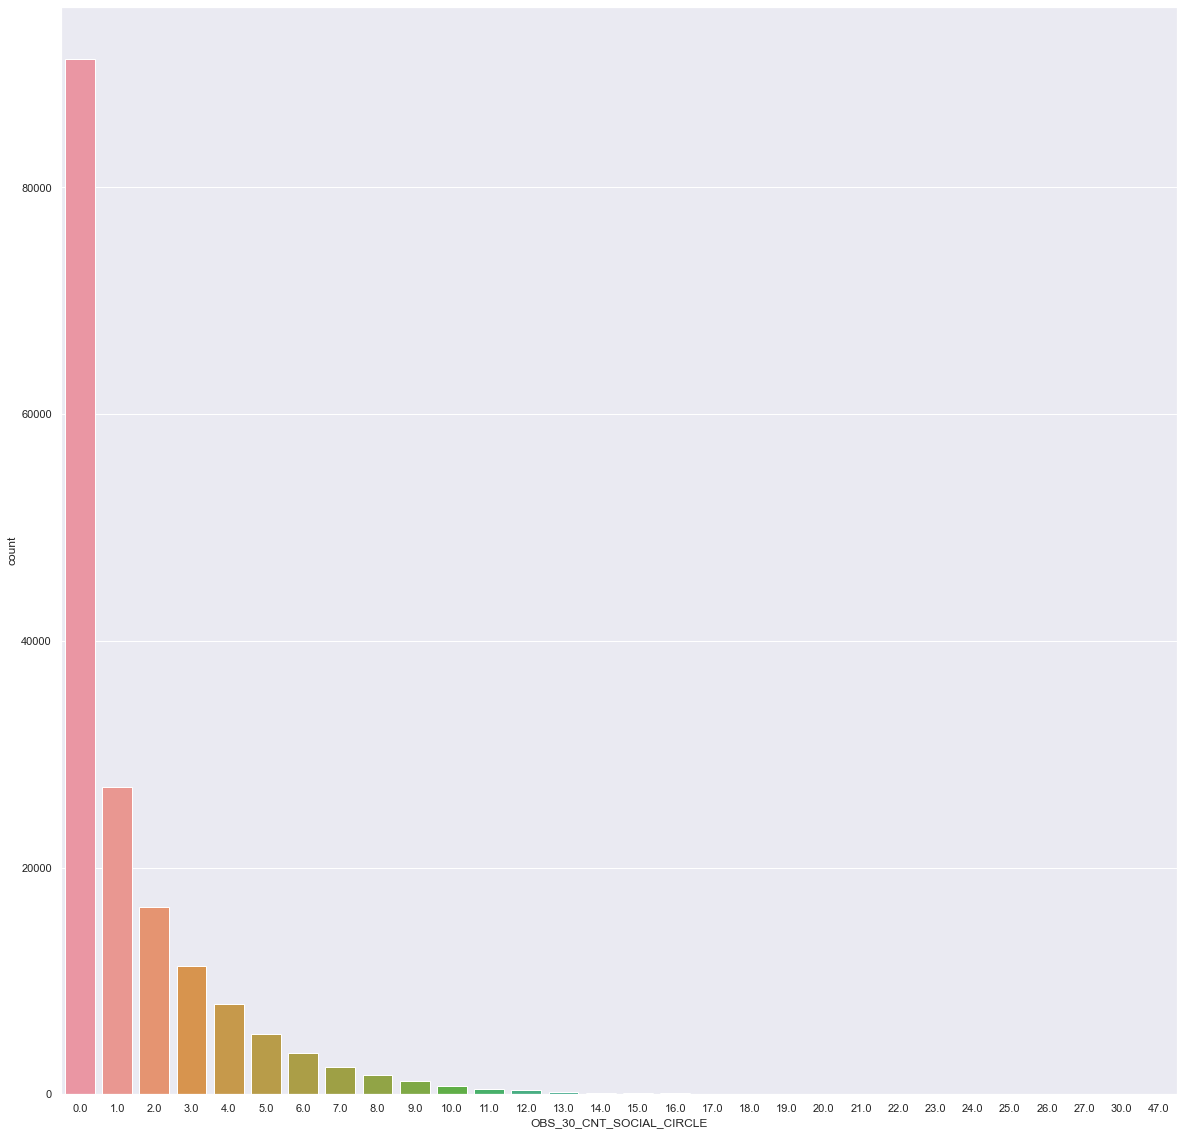

In [737]:
#data visualization
sns.countplot(data = eda7, x = 'OBS_30_CNT_SOCIAL_CIRCLE')

In [745]:
eda7['OBS_30_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
dtype: float64

In [127]:
#データ加工
eda7.fillna({'OBS_30_CNT_SOCIAL_CIRCLE':0.0}, inplace = True)
eda7_test.fillna({'OBS_30_CNT_SOCIAL_CIRCLE':0.0}, inplace = True)

In [128]:
eda7['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0     91906
1.0     27081
2.0     16499
3.0     11287
4.0      7974
5.0      5309
6.0      3612
7.0      2393
8.0      1673
9.0      1139
10.0      774
11.0      464
12.0      367
13.0      231
14.0      152
15.0       91
16.0       74
17.0       52
18.0       25
19.0       22
21.0       19
20.0       19
22.0       14
24.0       10
25.0        7
23.0        3
27.0        2
30.0        1
47.0        1
26.0        1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [129]:
# REG_REGION_NOT_WORK_REGIONをOne Hot Encoding
eda7_REG_REGION_NOT_WORK_REGION_ohe = pd.get_dummies(eda7["REG_REGION_NOT_WORK_REGION"]).add_prefix("REG_REGION_NOT_WORK_REGION")
eda7_test_REG_REGION_NOT_WORK_REGION_ohe = pd.get_dummies(eda7_test["REG_REGION_NOT_WORK_REGION"]).add_prefix("REG_REGION_NOT_WORK_REGION")

eda7 = pd.concat([eda7, eda7_REG_REGION_NOT_WORK_REGION_ohe], axis=1)
eda7_test = pd.concat([eda7_test, eda7_test_REG_REGION_NOT_WORK_REGION_ohe], axis=1)

eda7.drop('REG_REGION_NOT_WORK_REGION', axis=1, inplace=True)
eda7_test.drop('REG_REGION_NOT_WORK_REGION', axis=1, inplace=True)

eda7_test.head(5)

,DAYS_ID_PUBLISH,OBS_30_CNT_SOCIAL_CIRCLE,REG_REGION_NOT_WORK_REGION0,REG_REGION_NOT_WORK_REGION1
0,-3022,2.0,1,0
1,-253,5.0,1,0
2,-4495,7.0,1,0
3,-1189,2.0,1,0
4,-1728,2.0,1,0


In [130]:
print(eda7.shape)
print(eda7_test.shape)

(171202, 4)
(61500, 4)


In [131]:
#データ加工
eda7.loc[eda7["OBS_30_CNT_SOCIAL_CIRCLE"] >= 15, "OBS_30_CNT_SOCIAL_CIRCLE"] = '15以上'
eda7_test.loc[eda7_test["OBS_30_CNT_SOCIAL_CIRCLE"] >= 15, "OBS_30_CNT_SOCIAL_CIRCLE"] = '15以上'



In [132]:
#加工
eda7['publish'] = np.floor(eda7['DAYS_ID_PUBLISH']/(-365))
eda7_test['publish'] = np.floor(eda7_test['DAYS_ID_PUBLISH']/(-365))
eda7_test.head(3)


,DAYS_ID_PUBLISH,OBS_30_CNT_SOCIAL_CIRCLE,REG_REGION_NOT_WORK_REGION0,REG_REGION_NOT_WORK_REGION1,publish
0,-3022,2.0,1,0,8.0
1,-253,5.0,1,0,0.0
2,-4495,7.0,1,0,12.0


<AxesSubplot:xlabel='publish', ylabel='count'>

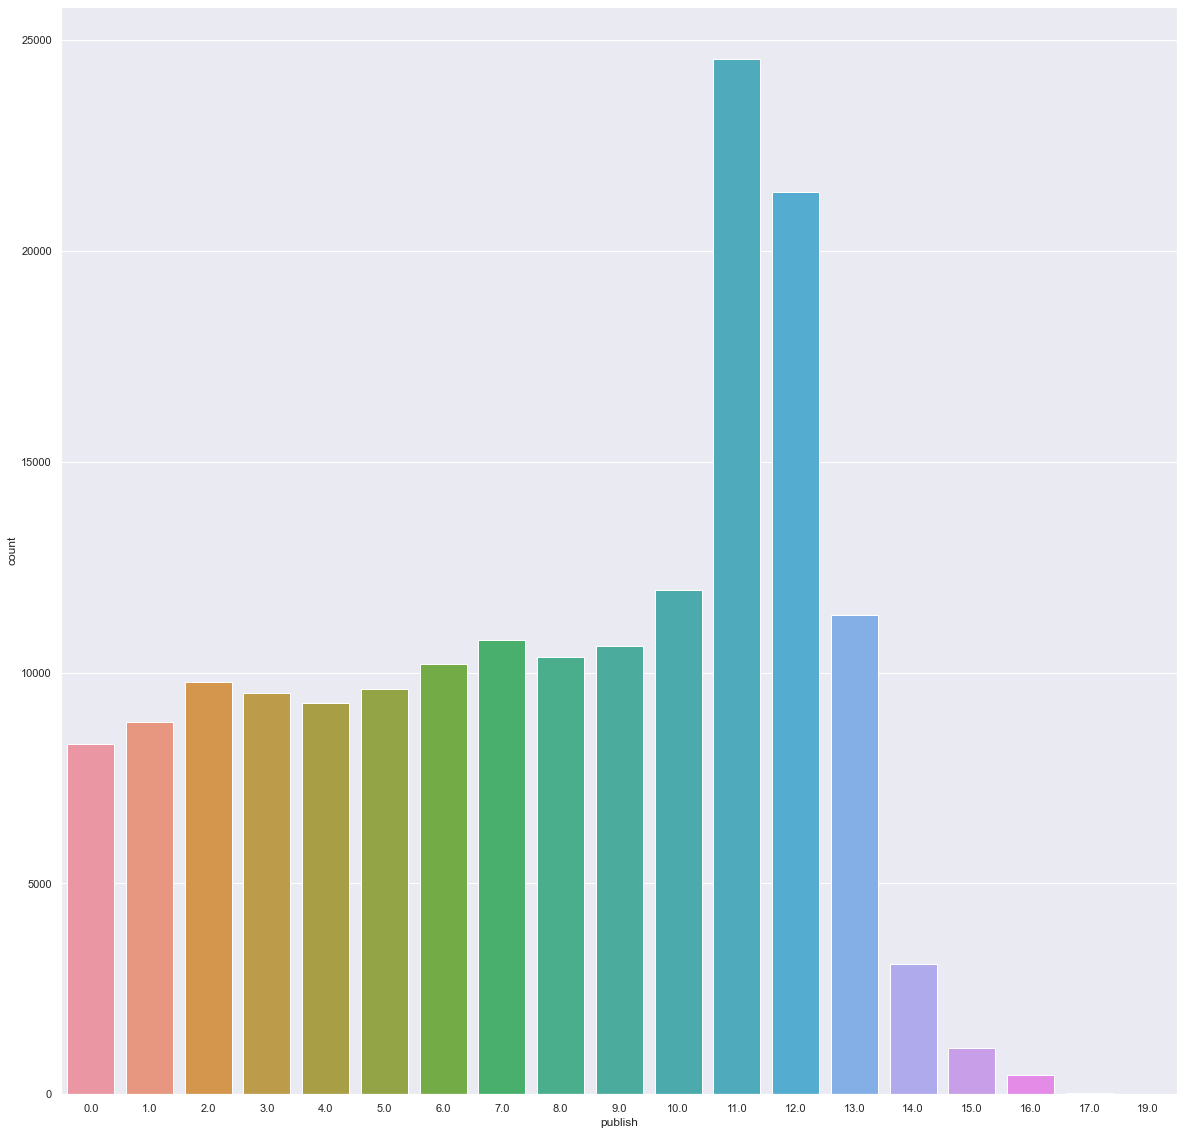

In [756]:
sns.countplot(data = eda7, x = 'publish')

In [133]:
# oldをグループ分け
eda7["publish"] = eda7["publish"] // 5
eda7_test["publish"] = eda7_test["publish"] // 5
eda7_test["publish"].unique()

array([1., 0., 2., 3.])

In [134]:
# oldをOne Hot Encoding
eda7_publish_ohe = pd.get_dummies(eda7["publish"]).add_prefix("publish")
eda7_test_publish_ohe = pd.get_dummies(eda7_test["publish"]).add_prefix("publish")

eda7 = pd.concat([eda7, eda7_publish_ohe], axis=1)
eda7_test = pd.concat([eda7_test, eda7_test_publish_ohe], axis=1)

eda7.drop('DAYS_ID_PUBLISH', axis=1, inplace=True)
eda7_test.drop('DAYS_ID_PUBLISH', axis=1, inplace=True)

eda7_test.head(5)

,OBS_30_CNT_SOCIAL_CIRCLE,REG_REGION_NOT_WORK_REGION0,REG_REGION_NOT_WORK_REGION1,publish,publish0.0,publish1.0,publish2.0,publish3.0
0,2.0,1,0,1.0,0,1,0,0
1,5.0,1,0,0.0,1,0,0,0
2,7.0,1,0,2.0,0,0,1,0
3,2.0,1,0,0.0,1,0,0,0
4,2.0,1,0,0.0,1,0,0,0


In [135]:
# REG_REGION_NOT_WORK_REGIONをOne Hot Encoding
eda7_OBS_30_CNT_SOCIAL_CIRCLE_ohe = pd.get_dummies(eda7["OBS_30_CNT_SOCIAL_CIRCLE"]).add_prefix("OBS_30_CNT_SOCIAL_CIRCLE")
eda7_test_OBS_30_CNT_SOCIAL_CIRCLE_ohe = pd.get_dummies(eda7_test["OBS_30_CNT_SOCIAL_CIRCLE"]).add_prefix("OBS_30_CNT_SOCIAL_CIRCLE")

eda7 = pd.concat([eda7, eda7_OBS_30_CNT_SOCIAL_CIRCLE_ohe], axis=1)
eda7_test = pd.concat([eda7_test, eda7_test_OBS_30_CNT_SOCIAL_CIRCLE_ohe], axis=1)

eda7.drop('OBS_30_CNT_SOCIAL_CIRCLE', axis=1, inplace=True)
eda7_test.drop('OBS_30_CNT_SOCIAL_CIRCLE', axis=1, inplace=True)

eda7_test.head(5)

,REG_REGION_NOT_WORK_REGION0,REG_REGION_NOT_WORK_REGION1,publish,publish0.0,publish1.0,publish2.0,publish3.0,OBS_30_CNT_SOCIAL_CIRCLE0.0,OBS_30_CNT_SOCIAL_CIRCLE1.0,OBS_30_CNT_SOCIAL_CIRCLE2.0,...,OBS_30_CNT_SOCIAL_CIRCLE6.0,OBS_30_CNT_SOCIAL_CIRCLE7.0,OBS_30_CNT_SOCIAL_CIRCLE8.0,OBS_30_CNT_SOCIAL_CIRCLE9.0,OBS_30_CNT_SOCIAL_CIRCLE10.0,OBS_30_CNT_SOCIAL_CIRCLE11.0,OBS_30_CNT_SOCIAL_CIRCLE12.0,OBS_30_CNT_SOCIAL_CIRCLE13.0,OBS_30_CNT_SOCIAL_CIRCLE14.0,OBS_30_CNT_SOCIAL_CIRCLE15以上
0,1,0,1.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,2.0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [136]:
eda7.columns

Index(['REG_REGION_NOT_WORK_REGION0', 'REG_REGION_NOT_WORK_REGION1', 'publish',
       'publish0.0', 'publish1.0', 'publish2.0', 'publish3.0',
       'OBS_30_CNT_SOCIAL_CIRCLE0.0', 'OBS_30_CNT_SOCIAL_CIRCLE1.0',
       'OBS_30_CNT_SOCIAL_CIRCLE2.0', 'OBS_30_CNT_SOCIAL_CIRCLE3.0',
       'OBS_30_CNT_SOCIAL_CIRCLE4.0', 'OBS_30_CNT_SOCIAL_CIRCLE5.0',
       'OBS_30_CNT_SOCIAL_CIRCLE6.0', 'OBS_30_CNT_SOCIAL_CIRCLE7.0',
       'OBS_30_CNT_SOCIAL_CIRCLE8.0', 'OBS_30_CNT_SOCIAL_CIRCLE9.0',
       'OBS_30_CNT_SOCIAL_CIRCLE10.0', 'OBS_30_CNT_SOCIAL_CIRCLE11.0',
       'OBS_30_CNT_SOCIAL_CIRCLE12.0', 'OBS_30_CNT_SOCIAL_CIRCLE13.0',
       'OBS_30_CNT_SOCIAL_CIRCLE14.0', 'OBS_30_CNT_SOCIAL_CIRCLE15以上'],
      dtype='object')

In [139]:
eda7.shape

(171202, 95)

In [140]:
eda7_test.shape

(61500, 93)

In [138]:
#最終5データ
eda7 = pd.concat([eda5, eda7], axis = 1)
eda7_test = pd.concat([eda5_test, eda7_test], axis = 1)


In [791]:
# 目的変数と説明変数に分割
X = eda7.drop("TARGET", axis=1).values
y = eda7["TARGET"].values
X_test = eda7_test.values



In [794]:
# 標準化
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
X_test_std = sc.transform(X_test)



In [795]:
# 訓練データと評価データに分割
X_train, X_valid, y_train, y_valid = train_test_split(X_std, y, test_size=0.3, stratify=y, random_state=1)

In [796]:
# XGBClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1)
xgb.fit(X_train, y_train)
xgb_train_pred = xgb.predict_proba(X_train)[:,1]
xgb_valid_pred = xgb.predict_proba(X_valid)[:,1]
print(f"Train Score: {roc_auc_score(y_train, xgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, xgb_valid_pred)}")

Train Score: 0.8512371576818465
Valid Score: 0.7294257356156132


In [797]:
# LGBMClassfier
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state = 1)
lgb.fit(X_train, y_train)

lgb_train_pred = lgb.predict_proba(X_train)[:, 1]
lgb_valid_pred = lgb.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, lgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, lgb_valid_pred)}")

Train Score: 0.8034380299290884
Valid Score: 0.7382316393090306


## 自己的8

In [802]:
#３つに絞る
features8 = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'DAYS_LAST_PHONE_CHANGE']
eda8 = train[features8]

eda8_test = test[features8]
eda8.head(5)

,NAME_TYPE_SUITE,NAME_INCOME_TYPE,DAYS_LAST_PHONE_CHANGE
0,Unaccompanied,Working,-292.0
1,Unaccompanied,Pensioner,-617.0
2,Family,State servant,-542.0
3,Children,Pensioner,0.0
4,Unaccompanied,Commercial associate,-1243.0


In [812]:
print(eda8.isnull().sum())
print(eda8_test.isnull().sum())

NAME_TYPE_SUITE           0
NAME_INCOME_TYPE          0
DAYS_LAST_PHONE_CHANGE    1
dtype: int64
NAME_TYPE_SUITE           0
NAME_INCOME_TYPE          0
DAYS_LAST_PHONE_CHANGE    0
dtype: int64


In [813]:
eda8['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      139192
Family              22356
Spouse, partner      6288
Children             1775
Other_B               955
Other_A               492
Group of people       144
Name: NAME_TYPE_SUITE, dtype: int64

<AxesSubplot:xlabel='NAME_TYPE_SUITE', ylabel='count'>

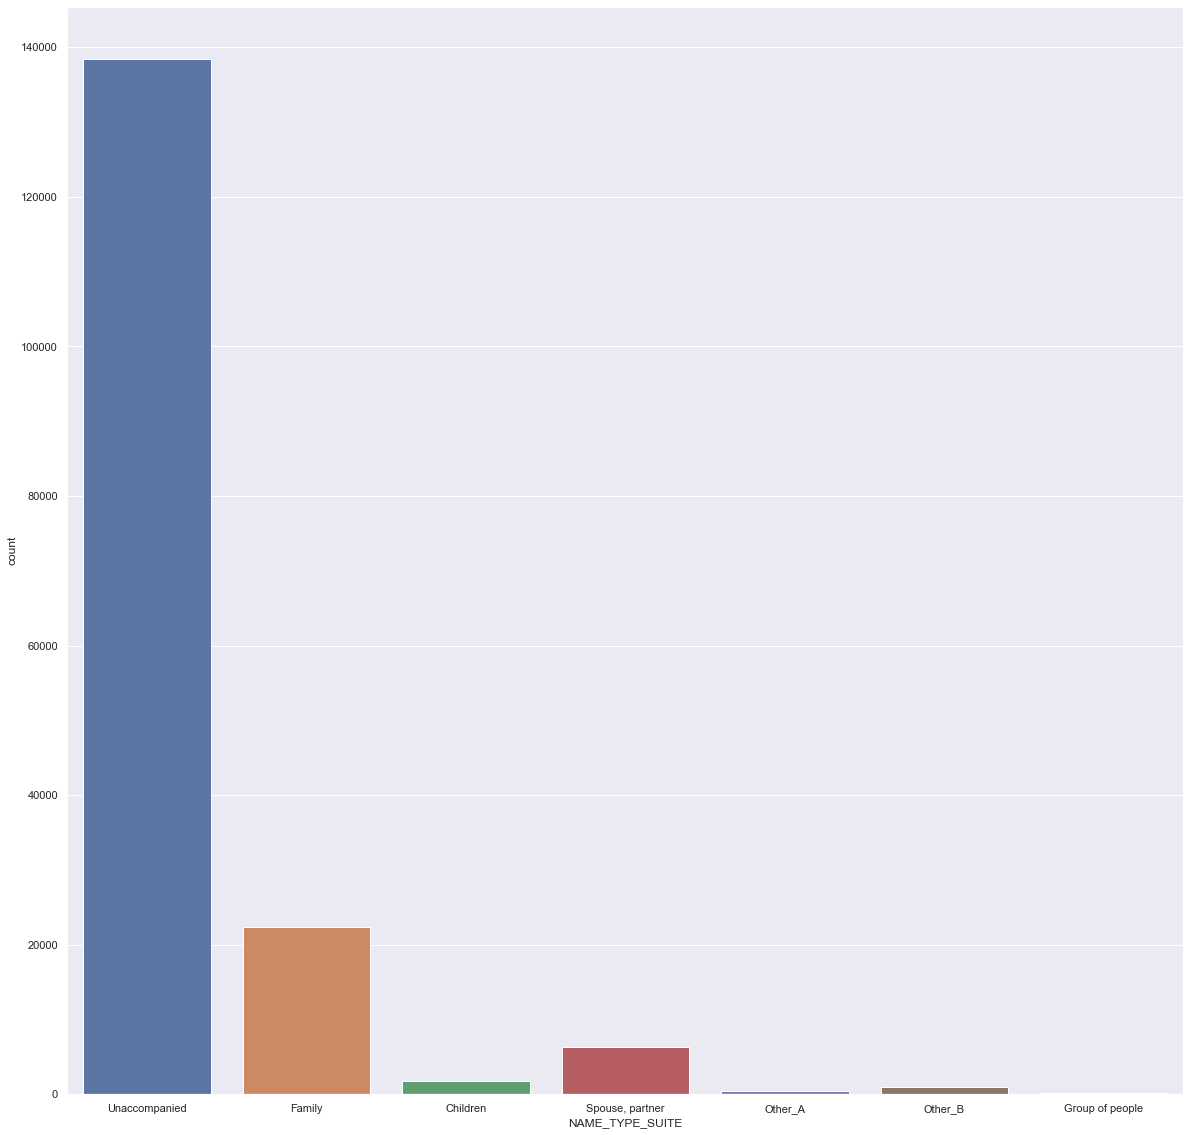

In [807]:
sns.countplot(data = eda8,x = 'NAME_TYPE_SUITE')

In [815]:
eda8['NAME_INCOME_TYPE'].value_counts()

Working                 88268
Commercial associate    40007
Pensioner               30895
State servant           12007
Unemployed                 10
Student                     9
Businessman                 3
Maternity leave             3
Name: NAME_INCOME_TYPE, dtype: int64

<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='count'>

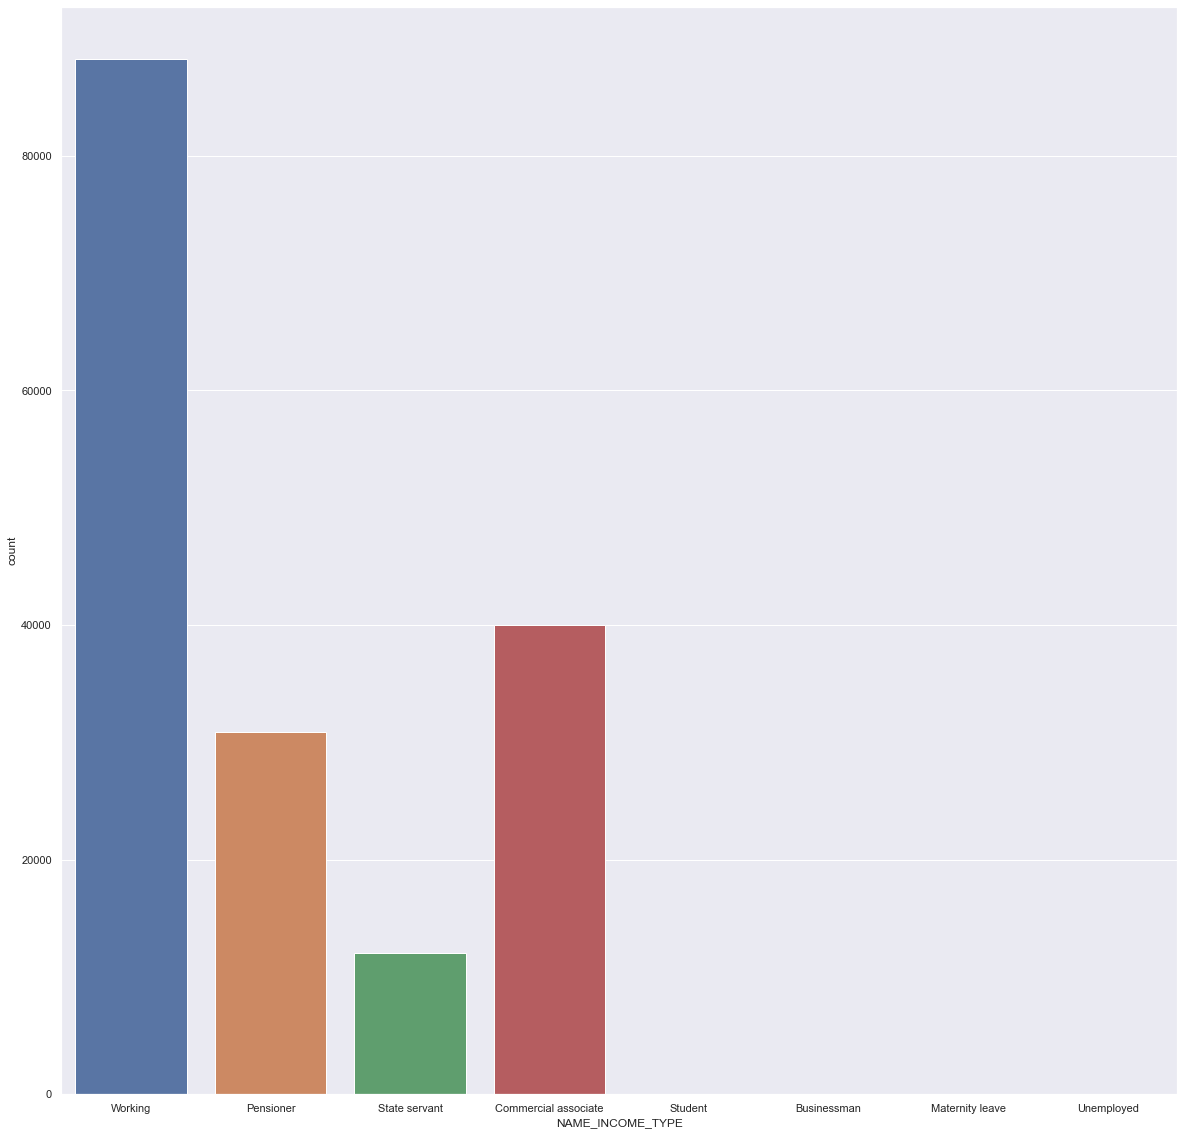

In [816]:
sns.countplot(data = eda8, x = 'NAME_INCOME_TYPE')

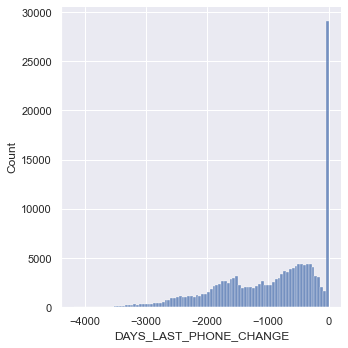

In [818]:
sns.displot(data = eda8, x = 'DAYS_LAST_PHONE_CHANGE' )

<AxesSubplot:xlabel='DAYS_LAST_PHONE_CHANGE'>

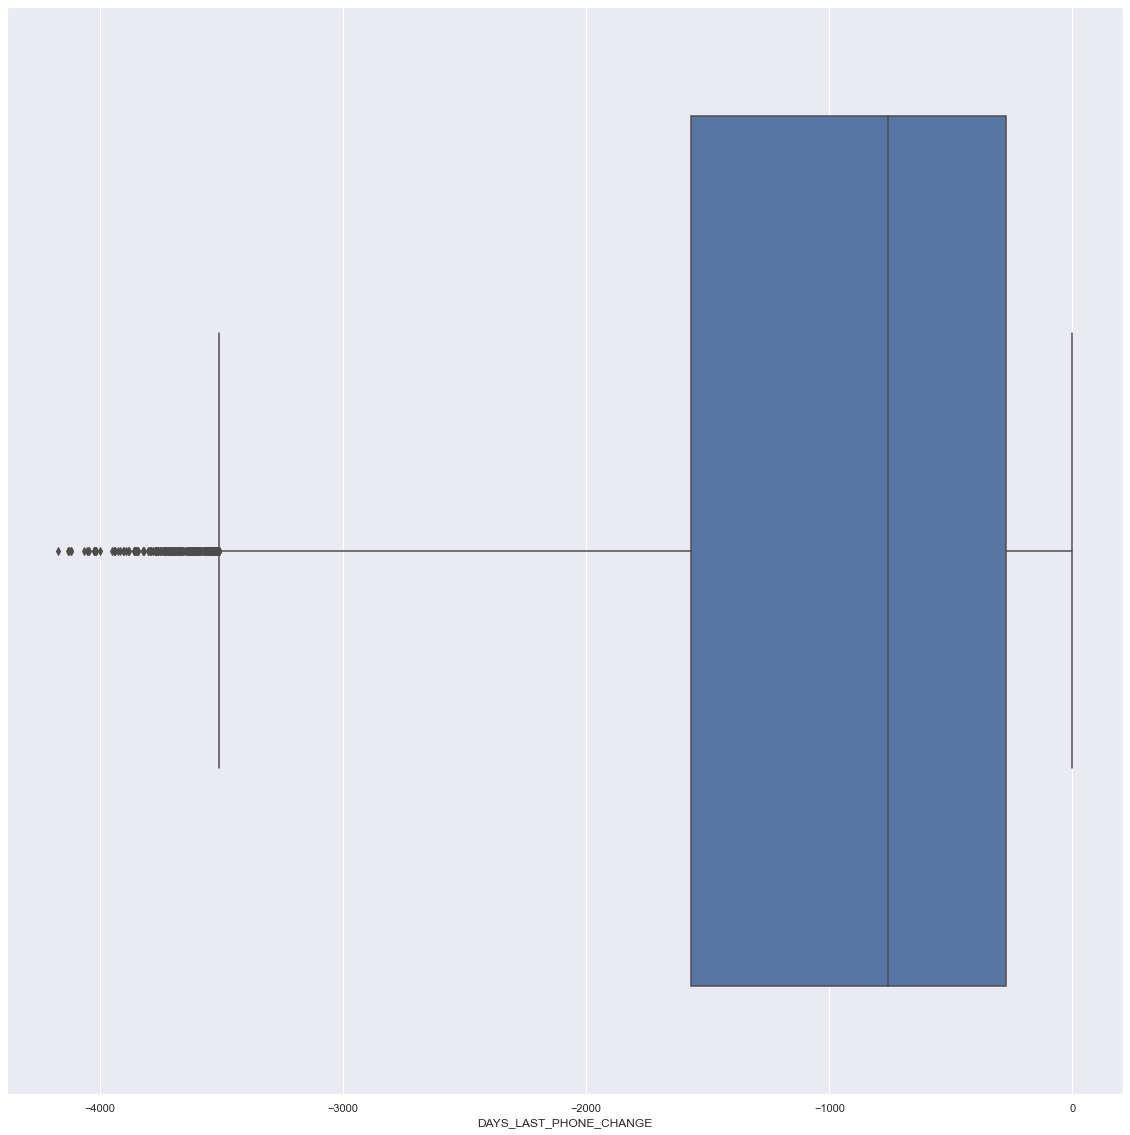

In [824]:
sns.boxplot(data = eda8, x = 'DAYS_LAST_PHONE_CHANGE')

In [823]:
eda8['DAYS_LAST_PHONE_CHANGE'].describe()

count    171201.000000
mean       -962.411218
std         826.278427
min       -4173.000000
25%       -1568.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [825]:
#データ加工
eda8 = eda8.fillna({'DAYS_LAST_PHONE_CHANGE':-962.411218})
eda8_test = eda8_test.fillna({'DAYS_LAST_PHONE_CHANGE':-962.411218})


In [826]:
eda8['YEARS_PHONE'] = np.floor(eda8['DAYS_LAST_PHONE_CHANGE']/(-365))
eda8_test['YEARS_PHONE'] = np.floor(eda8_test['DAYS_LAST_PHONE_CHANGE']/(-365))



In [827]:
eda8_test["YEARS_PHONE"].unique()

array([ 0.,  1.,  3.,  5.,  4.,  7.,  6.,  2.,  8.,  9., 11., 10.])

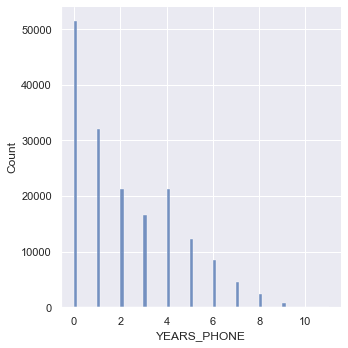

In [828]:
sns.displot(data = eda8, x = "YEARS_PHONE")

In [ ]:
# YEARS_EMPLOYEDをグループ分け
#eda8["YEARS_PHONE"] = eda8["YEARS_PHONE"] // 5
#eda8_test["YEARS_PHONE"] = eda8_test["YEARS_PHONE"] // 5
#eda8_test["YEARS_PHONE"].unique()

In [829]:


# YEARS_EMPLOYEDをOne Hot Encoding
eda8_YEARS_PHONE_ohe = pd.get_dummies(eda8["YEARS_PHONE"]).add_prefix("YEARS_PHONE")
eda8_test_YEARS_PHONE_ohe = pd.get_dummies(eda8_test["YEARS_PHONE"]).add_prefix("YEARS_PHONE")

eda8 = pd.concat([eda8, eda8_YEARS_PHONE_ohe], axis=1)
eda8_test = pd.concat([eda8_test, eda8_test_YEARS_PHONE_ohe], axis=1)

eda8.drop('YEARS_PHONE', axis=1, inplace=True)
eda8_test.drop('YEARS_PHONE', axis=1, inplace=True)

eda8_test.head(5)

,DAYS_LAST_PHONE_CHANGE,NAME_TYPE_SUITEChildren,NAME_TYPE_SUITEFamily,NAME_TYPE_SUITEGroup of people,NAME_TYPE_SUITEOther_A,NAME_TYPE_SUITEOther_B,"NAME_TYPE_SUITESpouse, partner",NAME_TYPE_SUITEUnaccompanied,NAME_INCOME_TYPEBusinessman,NAME_INCOME_TYPECommercial associate,...,YEARS_PHONE2.0,YEARS_PHONE3.0,YEARS_PHONE4.0,YEARS_PHONE5.0,YEARS_PHONE6.0,YEARS_PHONE7.0,YEARS_PHONE8.0,YEARS_PHONE9.0,YEARS_PHONE10.0,YEARS_PHONE11.0
0,-1.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-212.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-428.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-442.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1333.0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [811]:
#data加工
eda8.fillna({'NAME_TYPE_SUITE':'Unaccompanied'}, inplace = True)
eda8_test.fillna({'NAME_TYPE_SUITE':'Unaccompanied'}, inplace = True)

In [814]:
# NAME_TYPE_SUITEをOne Hot Encoding
eda8_NAME_TYPE_SUITE_ohe = pd.get_dummies(eda8["NAME_TYPE_SUITE"]).add_prefix("NAME_TYPE_SUITE")
eda8_test_NAME_TYPE_SUITE_ohe = pd.get_dummies(eda8_test["NAME_TYPE_SUITE"]).add_prefix("NAME_TYPE_SUITE")

eda8 = pd.concat([eda8, eda8_NAME_TYPE_SUITE_ohe], axis=1)
eda8_test = pd.concat([eda8_test, eda8_test_NAME_TYPE_SUITE_ohe], axis=1)

eda8.drop('NAME_TYPE_SUITE', axis=1, inplace=True)
eda8_test.drop('NAME_TYPE_SUITE', axis=1, inplace=True)

eda7_test.head(5)

,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,EXT_SOURCE_2,ORGANIZATION_TYPE,OWN_CAR_AGE_0.0,OWN_CAR_AGE_1.0,OWN_CAR_AGE_2.0,OWN_CAR_AGE_3.0,OWN_CAR_AGE_4.0,OWN_CAR_AGE_5.0,...,OBS_30_CNT_SOCIAL_CIRCLE6.0,OBS_30_CNT_SOCIAL_CIRCLE7.0,OBS_30_CNT_SOCIAL_CIRCLE8.0,OBS_30_CNT_SOCIAL_CIRCLE9.0,OBS_30_CNT_SOCIAL_CIRCLE10.0,OBS_30_CNT_SOCIAL_CIRCLE11.0,OBS_30_CNT_SOCIAL_CIRCLE12.0,OBS_30_CNT_SOCIAL_CIRCLE13.0,OBS_30_CNT_SOCIAL_CIRCLE14.0,OBS_30_CNT_SOCIAL_CIRCLE15以上
0,0,144000.0,0.720416,3866,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,103500.0,0.287306,4991,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,180000.0,0.352456,4336,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,225000.0,0.470384,37943,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,144000.0,0.373133,37943,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [817]:
# NAME_INCOME_TYPEをOne Hot Encoding
eda8_NAME_INCOME_TYPE_ohe = pd.get_dummies(eda8["NAME_INCOME_TYPE"]).add_prefix("NAME_INCOME_TYPE")
eda8_test_NAME_INCOME_TYPE_ohe = pd.get_dummies(eda8_test["NAME_INCOME_TYPE"]).add_prefix("NAME_INCOME_TYPE")

eda8 = pd.concat([eda8, eda8_NAME_INCOME_TYPE_ohe], axis=1)
eda8_test = pd.concat([eda8_test, eda8_test_NAME_INCOME_TYPE_ohe], axis=1)

eda8.drop('NAME_INCOME_TYPE', axis=1, inplace=True)
eda8_test.drop('NAME_INCOME_TYPE', axis=1, inplace=True)

eda7_test.head(5)

,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,EXT_SOURCE_2,ORGANIZATION_TYPE,OWN_CAR_AGE_0.0,OWN_CAR_AGE_1.0,OWN_CAR_AGE_2.0,OWN_CAR_AGE_3.0,OWN_CAR_AGE_4.0,OWN_CAR_AGE_5.0,...,OBS_30_CNT_SOCIAL_CIRCLE6.0,OBS_30_CNT_SOCIAL_CIRCLE7.0,OBS_30_CNT_SOCIAL_CIRCLE8.0,OBS_30_CNT_SOCIAL_CIRCLE9.0,OBS_30_CNT_SOCIAL_CIRCLE10.0,OBS_30_CNT_SOCIAL_CIRCLE11.0,OBS_30_CNT_SOCIAL_CIRCLE12.0,OBS_30_CNT_SOCIAL_CIRCLE13.0,OBS_30_CNT_SOCIAL_CIRCLE14.0,OBS_30_CNT_SOCIAL_CIRCLE15以上
0,0,144000.0,0.720416,3866,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,103500.0,0.287306,4991,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,180000.0,0.352456,4336,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,225000.0,0.470384,37943,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,144000.0,0.373133,37943,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [863]:
#最終5データ
eda8 = pd.concat([eda7, eda8], axis = 1)
eda8_test = pd.concat([eda7_test, eda8_test], axis = 1)



In [864]:
print(eda8.shape)
print(eda8_test.shape)

(171202, 145)
(61500, 144)


In [865]:
# 目的変数と説明変数に分割
X = eda8.drop("TARGET", axis=1).values
y = eda8["TARGET"].values
X_test = eda8_test.values


In [866]:
# 標準化
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
X_test_std = sc.transform(X_test)


In [867]:
# 訓練データと評価データに分割
X_train, X_valid, y_train, y_valid = train_test_split(X_std, y, test_size=0.3, stratify=y, random_state=1)

In [868]:
# XGBClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1)
xgb.fit(X_train, y_train)
xgb_train_pred = xgb.predict_proba(X_train)[:,1]
xgb_valid_pred = xgb.predict_proba(X_valid)[:,1]
print(f"Train Score: {roc_auc_score(y_train, xgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, xgb_valid_pred)}")

Train Score: 0.8627450296876393
Valid Score: 0.7302201356512906


In [869]:
# LGBMClassfier
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state = 1)
lgb.fit(X_train, y_train)

lgb_train_pred = lgb.predict_proba(X_train)[:, 1]
lgb_valid_pred = lgb.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, lgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, lgb_valid_pred)}")

Train Score: 0.8090069948939165
Valid Score: 0.7382641496017004


In [870]:
#予測値の作成
pred = lgb.predict_proba(X_test)[:, 1]

In [871]:
# 予測結果を提出用のフォーマットに格納
sample_sub['TARGET'] = pred
sample_sub

,SK_ID_CURR,TARGET
0,171202,0.017188
1,171203,0.036714
2,171204,0.062941
3,171205,0.028919
4,171206,0.023026
...,...,...
61495,232697,0.033525
61496,232698,0.037460
61497,232699,0.026783
61498,232700,0.022300


In [872]:
# 提出用のcsvファイルを作成
sample_sub.to_csv('/Users/suxuanrong/Desktop/关于横市啊/GCI/コンペ２/提出結果/submission8.csv',index=False)